In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# Set floating point precision option for pandas
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Import seaborn library and set context and style
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

# Import warnings and set filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import time library
from time import time

# Import matplotlib ticker and scipy stats
import matplotlib.ticker as tkr
from scipy import stats

# Import statistical tools for time series analysis
from statsmodels.tsa.stattools import adfuller

# Import preprocessing from sklearn
from sklearn import preprocessing

# Import partial autocorrelation function from statsmodels
from statsmodels.tsa.stattools import pacf

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

# Import math library
import math

# Import necessary functions from keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Import mean squared error and mean absolute error from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', delimiter=';')
# data.head()

In [ ]:


# #Ekhan theke
# sample_size = int(0.01 * len(data))  # 1% sample size
# sampled_data = data.sample(sample_size)
# sampled_data.head(5)

# data2 = sampled_data
# #Eituk


#df = pd.DataFrame(data2)
#df.to_csv('/content/drive/MyDrive/data_no_index.csv', index=False)  # Save without row index
#df.to_csv('/content/drive/MyDrive/individual+household+electric+power+consumption/data_tab_delimited.csv', sep='\t')
#df.to_csv('/content/drive/MyDrive/individual+household+electric+power+consumption/my_data.csv', mode='a', header=False)
# float_column = data["Global_active_power"]
# average = float_column.mean()
# median = float_column.median()
# minimum = float_column.min()
# maximum = float_column.max()


# grouped_data = data.groupby("Global_active_power").agg(
#     mean=("float_column", "mean"),
#     median=("float_column", "median"),
#     min=("float_column", "min"),
#     max=("float_column", "max"),
# )
# data2 = grouped_data
# data2.head()

In [ ]:
#data2.head()

In [ ]:
#print("\nInformation about the dataframe:")
#print(data.info())

In [ ]:
#data['date_time'] = pd.to_datetime(data['Date'] + ' ' + data['Time']) #this is too slow

In [ ]:
#data2['date_time'] = pd.to_datetime(data2['Date'] + ' ' + data2['Time'])

In [ ]:
#This block of code worked and saved on my drive
# df = pd.DataFrame(data2)
# df.to_csv('/content/drive/MyDrive/eta.csv')
# df2 = pd.DataFrame(data)
# df2.to_csv('/content/drive/MyDrive/etaysob.csv')
#

 # Save without row index
#df.to_csv('/content/drive/MyDrive/individual+household+electric+power+consumption/data_tab_delimited.csv', sep='\t')
#df.to_csv('/content/drive/MyDrive/individual+household+electric+power+consumption/my_data.csv', mode='a', header=False)


In [ ]:
!pip install tensorflow==2.9.1 adabelief-tf==0.2.0

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/ab.csv')
data2 = data2.iloc[:, 1:]
data = pd.read_csv('/content/drive/MyDrive/etaysob.csv')
data = data.iloc[:, 1:]

In [ ]:
# if data2.shape == data3.shape and all(data2 == data3):
#     print("DataFrames are equal.")
# else:
#     print("DataFrames are not equal.")
# df_diff = data2.compare(data3)
# print(df_diff)
print(data2)


In [ ]:
print(data.shape)
print(data2.shape)

In [ ]:
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data2['Global_active_power'] = pd.to_numeric(data2['Global_active_power'], errors='coerce')
data = data.dropna(subset=['Global_active_power'])
data2 = data2.dropna(subset=['Global_active_power'])

In [ ]:
data['date_time'] = pd.to_datetime(data['date_time'])

data2['date_time'] = pd.to_datetime(data2['date_time'])

In [ ]:
11111

In [ ]:
data['year'] = data['date_time'].apply(lambda x: x.year)
data['quarter'] = data['date_time'].apply(lambda x: x.quarter)
data['month'] = data['date_time'].apply(lambda x: x.month)
data['day'] = data['date_time'].apply(lambda x: x.day)
data['hour'] = data['date_time'].apply(lambda x: x.hour)

data2['year'] = data2['date_time'].apply(lambda x: x.year)
data2['quarter'] = data2['date_time'].apply(lambda x: x.quarter)
data2['month'] = data2['date_time'].apply(lambda x: x.month)
data2['day'] = data2['date_time'].apply(lambda x: x.day)

# New Section

In [ ]:
data = data.loc[:,['date_time','Global_active_power', 'year','quarter','month','day','hour']]
data2 = data2.loc[:,['date_time','Global_active_power', 'year','quarter','month','day']]

In [ ]:
data.sort_values('date_time', inplace=True, ascending=True)
data2.sort_values('date_time', inplace=True, ascending=True)

In [ ]:
data = data.reset_index(drop=True)
data2 = data2.reset_index(drop=True)

In [ ]:
data['weekday'] = data['date_time'].apply(lambda x: x.weekday() < 5).astype(int)
data2['weekday'] = data2['date_time'].apply(lambda x: x.weekday() < 5).astype(int)

In [ ]:
print('Number of rows and columns:', data.shape)

# Print the minimum and maximum date_time values
print('Minimum date_time:', data.date_time.min())
print('Maximum date_time:', data.date_time.max())

# Display the last 5 rows of the data
data.tail(5)

Number of rows and columns: (2049280, 8)
Minimum date_time: 2006-12-16 17:24:00
Maximum date_time: 2010-12-11 23:59:00


,date_time,Global_active_power,year,quarter,month,day,hour,weekday
2049275,2010-12-11 23:55:00,0.6900,2010,4,12,11,23,0
2049276,2010-12-11 23:56:00,0.6880,2010,4,12,11,23,0
2049277,2010-12-11 23:57:00,0.6880,2010,4,12,11,23,0
2049278,2010-12-11 23:58:00,0.6880,2010,4,12,11,23,0
2049279,2010-12-11 23:59:00,0.6880,2010,4,12,11,23,0


In [ ]:
import scipy.stats as stats

# Calculate the test statistics and p-value
stat, p = stats.normaltest(data.Global_active_power)

# Print the results
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Set the significance level
alpha = 0.05

# Make a decision on the test result
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=724881.795, p=0.000
Data does not look Gaussian (reject H0)


In [ ]:
sns.distplot(data.Global_active_power,color='purple')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data.Global_active_power)))




In [ ]:
sns.distplot(data2.Global_active_power,color='blue')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data2.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data2.Global_active_power)))

In [ ]:
print(data2.Global_active_power)

In [ ]:
print(data.Global_active_power)

In [ ]:
data1 = data[(data.date_time >= '2010-07-01') & (data.date_time < '2010-7-16')]

# plt.figure(figsize=(14,6))
# plt.plot(data1.date_time, data1.Global_active_power, color='purple')
# plt.ylabel('Global Active Power (kW)', fontsize=12)
# plt.xlabel('Date', fontsize=12)
# plt.title('Active Power Consumption for a Particular Time Frame', fontsize=14)
# plt.tight_layout()
# plt.grid(True)
# sns.despine(bottom=True, left=True)
# plt.show()

In [ ]:
data1.head()

In [ ]:
data3 = data2[(data2.date_time >= '2010-07-01') & (data2.date_time < '2010-7-16')]

# plt.figure(figsize=(14,6))
# plt.plot(data3.date_time, data3.Global_active_power, color='blue')
# plt.ylabel('Global Active Power (kW)', fontsize=12)
# plt.xlabel('Date', fontsize=12)
# plt.title('Active Power Consumption for a Particular Time Frame', fontsize=14)
# plt.tight_layout()
# plt.grid(True)
# sns.despine(bottom=True, left=True)
# plt.show()

In [ ]:
data3.head()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create a figure with 2 subplots
# plt.figure(figsize=(12,5))

# # Plot the first subplot showing the violinplot of yearly global active power
# plt.subplot(1,2,1)
# # Adjust the subplot's width
# plt.subplots_adjust(wspace=0.2)
# # Create the violinplot using Seaborn's violinplot function
# sns.violinplot(x="year", y="Global_active_power", data=data, color='purple')
# # Label the x-axis
# plt.xlabel('Year', fontsize=12)
# # Add a title to the plot
# plt.title('Violin plot of Yearly Global Active Power', fontsize=14)
# # Remove the top and right spines of the plot
# sns.despine(left=True, bottom=True)
# # Add a tight layout to the plot
# plt.tight_layout()

# # Plot the second subplot showing the violinplot of quarterly global active power
# plt.subplot(1,2,2)
# # Create the violinplot using Seaborn's violinplot function
# sns.violinplot(x="quarter", y="Global_active_power", data=data, color='purple')
# # Label the x-axis
# plt.xlabel('Quarter', fontsize=12)
# # Add a title to the plot
# plt.title('Violin plot of Quarterly Global Active Power', fontsize=14)
# # Remove the top and right spines of the plot
# sns.despine(left=True, bottom=True)
# # Add a tight layout to the plot
# plt.tight_layout()

In [ ]:
# plt.figure(figsize=(12,5))

# # Plot the first subplot showing the violinplot of yearly global active power
# plt.subplot(1,2,1)
# # Adjust the subplot's width
# plt.subplots_adjust(wspace=0.2)
# # Create the violinplot using Seaborn's violinplot function
# sns.violinplot(x="year", y="Global_active_power", data=data2, color='blue')
# # Label the x-axis
# plt.xlabel('Year', fontsize=12)
# # Add a title to the plot
# plt.title('Violin plot of Yearly Global Active Power', fontsize=14)
# # Remove the top and right spines of the plot
# sns.despine(left=True, bottom=True)
# # Add a tight layout to the plot
# plt.tight_layout()

# # Plot the second subplot showing the violinplot of quarterly global active power
# plt.subplot(1,2,2)
# # Create the violinplot using Seaborn's violinplot function
# sns.violinplot(x="quarter", y="Global_active_power", data=data2, color='blue')
# # Label the x-axis
# plt.xlabel('Quarter', fontsize=12)
# # Add a title to the plot
# plt.title('Violin plot of Quarterly Global Active Power', fontsize=14)
# # Remove the top and right spines of the plot
# sns.despine(left=True, bottom=True)
# # Add a tight layout to the plot
# plt.tight_layout()

In [ ]:
# Plotting the histogram and normal probability plot for 'Global_active_power' column
plt.figure(figsize=(15,7))

# Histogram of 'Global_active_power' column
plt.subplot(1,2,1)
data1['Global_active_power'].hist(bins=70, color='purple')
plt.title('Global Active Power Distribution', fontsize=16)

# Normal Probability Plot of 'Global_active_power' column
# Normal Probability Plot of 'Global_active_power' column
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(data1['Global_active_power'], plot=plt, fit=True, rvalue=True)
# Change the color of the data points
plt.gca().get_lines()[0].set_color('green')  # Set the color of the data points to green
# Add a line to the plot
plt.plot([0, max(data1['Global_active_power'])], [0, max(data1['Global_active_power'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot of Global Active Power', fontsize=14)


# Printing the summary statistics of 'Global_active_power' column
print(data1.describe().T)

In [ ]:
plt.figure(figsize=(15,7))

# Histogram of 'Global_active_power' column
plt.subplot(1,2,1)
data3['Global_active_power'].hist(bins=70, color='blue')
plt.title('Global Active Power Distribution', fontsize=16)

# Normal Probability Plot of 'Global_active_power' column
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(data3['Global_active_power'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(data1['Global_active_power'])], [0, max(data3['Global_active_power'])], color='blue', linestyle='--')
plt.title('Normal Probability Plot of Global Active Power', fontsize=14)


# Printing the summary statistics of 'Global_active_power' column
print(data3.describe().T)

In [ ]:
data1.head()

In [ ]:
data1=data.loc[:,['date_time','Global_active_power']]
data1.set_index('date_time',inplace=True)

data4=data2.loc[:,['date_time','Global_active_power']]
data4.set_index('date_time',inplace=True)

In [ ]:
# Assuming 'data1' has a datetime index (adjust if necessary)

# Select the desired day (replace with the actual date)
desired_day = '2010-07-02'
daily_data = data1[data1.index.date == desired_day]

# Resample by hour and calculate the mean for each hour
hourly_mean = daily_data['Global_active_power'].resample('H').mean()

# Create a color list for each hour (you can customize the colors)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] * 4  # Repeat 4 times for 24 hours

# Create the plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
for i, hour in enumerate(hourly_mean.index.hour):
  plt.plot(hourly_mean.index[hourly_mean.index.hour == hour], hourly_mean[hourly_mean.index.hour == hour], marker='o', linestyle='-', label=f'{hour} Hour', color=colors[i])

# Set labels and title
plt.xlabel('Time of Day')
plt.ylabel('Mean Global Active Power')
plt.title(f'Mean Global Active Power by Hour for {desired_day}')
plt.legend(title='Hour of Day')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
fig = plt.figure(figsize=(22,20))
# Adjust the subplot spacing
fig.subplots_adjust(hspace=1)

# Create first subplot
ax1 = fig.add_subplot(5,1,1)
# Plot the resampled mean of Global_active_power over day with different color
ax1.plot(data1['Global_active_power'].resample('D').mean(), linewidth=1, color='green')
# Set the title for the subplot
ax1.set_title('Mean Global active power resampled over day')
# Set major tick parameters for the subplot
ax1.tick_params(axis='both', which='major')




# Create second subplot
ax2 = fig.add_subplot(5,1,2, sharex=ax1)
# Plot the resampled mean of Global_active_power over week with different color
ax2.plot(data1['Global_active_power'].resample('W').mean(), linewidth=1, color='green')
# Set the title for the subplot
ax2.set_title('Mean Global active power resampled over week')
# Set major tick parameters for the subplot
ax2.tick_params(axis='both', which='major')

# Create third subplot
ax3 = fig.add_subplot(5,1,3, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax3.plot(data1['Global_active_power'].resample('M').mean(), linewidth=1, color='green')
# Set the title for the subplot
ax3.set_title('Mean Global active power resampled over month')
# Set major tick parameters for the subplot
ax3.tick_params(axis='both', which='major')

# Create third subplot
ax4  = fig.add_subplot(5,1,4, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax4.plot(data1['Global_active_power'].resample('Q').mean(),linewidth=1, color='green')
# Set the title for the subplot
ax4.set_title('Mean Global active power resampled over quarter')
# Set major tick parameters for the subplot
ax4.tick_params(axis='both', which='major')


# Create third subplot
ax5  = fig.add_subplot(5,1,5, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax5.plot(data1['Global_active_power'].resample('A').mean(),linewidth=1, color='green')
# Set the title for the subplot
ax5.set_title('Mean Global active power resampled over year')
# Set major tick parameters for the subplot
ax5.tick_params(axis='both', which='major')

In [ ]:
fig = plt.figure(figsize=(22,20))
# Adjust the subplot spacing
fig.subplots_adjust(hspace=1)

# Create first subplot
ax1 = fig.add_subplot(5,1,1)
# Plot the resampled mean of Global_active_power over day with different color
ax1.plot(data4['Global_active_power'].resample('D').mean(), linewidth=1, color='blue')
# Set the title for the subplot
ax1.set_title('Mean Global active power resampled over day')
# Set major tick parameters for the subplot
ax1.tick_params(axis='both', which='major')

# Create second subplot
ax2 = fig.add_subplot(5,1,2, sharex=ax1)
# Plot the resampled mean of Global_active_power over week with different color
ax2.plot(data4['Global_active_power'].resample('W').mean(), linewidth=1, color='blue')
# Set the title for the subplot
ax2.set_title('Mean Global active power resampled over week')
# Set major tick parameters for the subplot
ax2.tick_params(axis='both', which='major')

# Create third subplot
ax3 = fig.add_subplot(5,1,3, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax3.plot(data4['Global_active_power'].resample('M').mean(), linewidth=1, color='blue')
# Set the title for the subplot
ax3.set_title('Mean Global active power resampled over month')
# Set major tick parameters for the subplot
ax3.tick_params(axis='both', which='major')

# Create third subplot
ax4  = fig.add_subplot(5,1,4, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax4.plot(data4['Global_active_power'].resample('Q').mean(),linewidth=1, color='blue')
# Set the title for the subplot
ax4.set_title('Mean Global active power resampled over quarter')
# Set major tick parameters for the subplot
ax4.tick_params(axis='both', which='major')


# Create third subplot
ax5  = fig.add_subplot(5,1,5, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax5.plot(data4['Global_active_power'].resample('A').mean(),linewidth=1, color='blue')
# Set the title for the subplot
ax5.set_title('Mean Global active power resampled over year')
# Set major tick parameters for the subplot
ax5.tick_params(axis='both', which='major')

In [ ]:
# Import the matplotlib library for plotting graphs
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 2 columns and set its size to 14x8
plt.figure(figsize=(16,10))

# First subplot in the first row, first column
plt.subplot(2,2,1)
# Group data by year and take the mean of the 'Global_active_power' column
grouped_by_year = data.groupby('year').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by year with red color
grouped_by_year.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Year' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Year', fontsize=14, fontweight='bold')

# Second subplot in the first row, second column
plt.subplot(2,2,2)
# Group data by quarter and take the mean of the 'Global_active_power' column
grouped_by_quarter = data.groupby('quarter').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by quarter with blue color
grouped_by_quarter.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Quarter' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Quarter', fontsize=14, fontweight='bold')

# Third subplot in the second row, first column
plt.subplot(2,2,3)
# Group data by month and take the mean of the 'Global_active_power' column
grouped_by_month = data.groupby('month').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by month with purple color
grouped_by_month.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Month' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Month', fontsize=14, fontweight='bold')

# Fourth subplot in the second row, second column
plt.subplot(2,2,4)
# Group data by day and take the mean of the 'Global_active_power' column
grouped_by_day = data.groupby('day').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by day with green color
grouped_by_day.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Day' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Day', fontsize=14, fontweight='bold')

# Use tight_layout to adjust the subplots so that they fit into the figure area
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Import the matplotlib library for plotting graphs
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 2 columns and set its size to 14x8
plt.figure(figsize=(16,10))

# First subplot in the first row, first column
plt.subplot(2,2,1)
# Group data by year and take the mean of the 'Global_active_power' column
grouped_by_year = data2.groupby('year').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by year with red color
grouped_by_year.plot(color='blue')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Year' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Year', fontsize=14, fontweight='bold')

# Second subplot in the first row, second column
plt.subplot(2,2,2)
# Group data by quarter and take the mean of the 'Global_active_power' column
grouped_by_quarter = data2.groupby('quarter').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by quarter with blue color
grouped_by_quarter.plot(color='blue')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Quarter' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Quarter', fontsize=14, fontweight='bold')

# Third subplot in the second row, first column
plt.subplot(2,2,3)
# Group data by month and take the mean of the 'Global_active_power' column
grouped_by_month = data2.groupby('month').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by month with purple color
grouped_by_month.plot(color='blue')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Month' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Month', fontsize=14, fontweight='bold')

# Fourth subplot in the second row, second column
plt.subplot(2,2,4)
# Group data by day and take the mean of the 'Global_active_power' column
grouped_by_day = data2.groupby('day').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by day with green color
grouped_by_day.plot(color='blue')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Day' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Day', fontsize=14, fontweight='bold')

# Use tight_layout to adjust the subplots so that they fit into the figure area
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationarity(timeseries):
    # Calculate rolling mean and standard deviation
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()

    # Plot original timeseries, rolling mean, and rolling standard deviation
    plt.figure(figsize=(20,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='pink',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    # Add legend
    plt.legend(loc='best')
    # Add title
    plt.title('Rolling Mean & Standard Deviation of Global Active Power')
    plt.show()

    # Perform and display results of Dickey-Fuller test
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
# Assuming test_stationarity() is a custom function to test stationarity
test_stationarity(data2['Global_active_power'].dropna().head(800))


In [ ]:
import pandas as pd
import numpy as np

def remove_outliers(df, date_time):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df['date_time'].quantile(0.25)
    Q3 = df['date_time'].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows where the column value is an outlier
    cleaned_df = df[(df['date_time'] >= lower_bound) & (df['date_time'] <= upper_bound)]

    return cleaned_df

# Example usage:
# Sample DataFrame (replace this with your own DataFrame)


# Remove rows with outliers in column 'B'
df = pd.DataFrame(data)
cleaned_df = remove_outliers(df, 'date_time')

print("Original DataFrame:")
print(df)
print("\nCleaned DataFrame (without rows containing outliers in column 'B'):")
print(cleaned_df.head(40))

# lstm for sampled data

In [ ]:
#Transform the Global_active_power column of the data DataFrame into a numpy array of float values

dataset = data2.Global_active_power.values.astype('float32')
#Reshape the numpy array into a 2D array with 1 column

dataset = np.reshape(dataset, (-1, 1))
#Create an instance of the MinMaxScaler class to scale the values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
#Fit the MinMaxScaler to the transformed data and transform the values

dataset = scaler.fit_transform(dataset)
#Split the transformed data into a training set (80%) and a test set (20%)

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
col_dates = data.date_time.values
col_dates = np.reshape(col_dates, (-1, 1))
date_train, date_test = col_dates[0:train_size, :], col_dates[train_size:len(dataset), :]

In [ ]:
def create_dataset(dataset, dates, look_back=1):
    X, Y = [], []
    d = []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        d.append(dates[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(d)



In [ ]:
look_back = 30
X_trainr, Y_trainr, d_trainr = create_dataset(train, date_train, look_back)
X_testr, Y_testr, d_testr = create_dataset(test, date_test, look_back)

In [ ]:
look_back = 30
X_train8, Y_train8, d_train8 = create_dataset(train, date_train, look_back)
X_test8, Y_test8, d_test8 = create_dataset(test, date_test, look_back)

In [ ]:
look_back = 30
X_train, Y_train, d_train = create_dataset(train, date_train, look_back)
X_test, Y_test, d_test = create_dataset(test, date_test, look_back)

In [ ]:
look_back = 30
X_train, Y_train, d_train = create_dataset(train, date_train, look_back)
X_test, Y_test, d_test = create_dataset(test, date_test, look_back)

X_train2, Y_train2, d_train2 = create_dataset(train, date_train, look_back)
X_test2, Y_test2, d_test2 = create_dataset(test, date_test, look_back)

X_train3, Y_train3, d_train3 = X_train, Y_train, d_train
X_test3, Y_test3, d_test3 = X_test, Y_test, d_test

X_train4, Y_train4, d_train4 = X_train, Y_train, d_train
# X_val4, Y_val4, d_val4 = X_val, Y_val, d_val
X_test4, Y_test4, d_test4 = X_test, Y_test, d_test

X_train5, Y_train5, d_train5 = X_train, Y_train, d_train
X_test5, Y_test5, d_test5 = X_test, Y_test, d_test

In [ ]:
X_train.shape

In [ ]:
Y_train

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(79961, 1, 30)

In [ ]:
X_train2 = np.reshape(X_train2, (X_train2.shape[0], 1, X_train2.shape[1]))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], 1, X_test2.shape[1]))
X_train2.shape


(79961, 1, 30)

In [ ]:
X_train3 = np.reshape(X_train3, (X_train3.shape[0], 1, X_train3.shape[1]))
X_test3 = np.reshape(X_test3, (X_test3.shape[0], 1, X_test3.shape[1]))

In [ ]:
X_train4 = np.reshape(X_train4, (X_train4.shape[0], 1, X_train4.shape[1]))
# X_val4 = np.reshape(X_val4, (X_val4.shape[0], 1, X_val4.shape[1]))
X_test4 = np.reshape(X_test4, (X_test4.shape[0], 1, X_test4.shape[1]))

X_train5 = np.reshape(X_train5, (X_train5.shape[0], 1, X_train5.shape[1]))
X_test5 = np.reshape(X_test5, (X_test5.shape[0], 1, X_test5.shape[1]))

In [ ]:
X_train8 = np.reshape(X_train8, (X_train8.shape[0], 1, X_train8.shape[1]))
X_test8 = np.reshape(X_test8, (X_test8.shape[0], 1, X_test8.shape[1]))

In [ ]:
# # Defining the LSTM model
# model = Sequential()

# # Adding the first layer with 100 LSTM units and input shape of the data
# model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))

# # Adding a dropout layer to avoid overfitting
# model.add(Dropout(0.2))

# # Adding a dense layer with 1 unit to make predictions
# model.add(Dense(1))

# # Compiling the model with mean squared error as the loss function and using Adam optimizer
# model.compile(loss='mean_squared_error', optimizer='adam')

# # Fitting the model on training data and using early stopping to avoid overfitting
# history1 = model.fit(X_train, Y_train, epochs=10, batch_size=1600, validation_data=(X_test, Y_test),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# # Displaying a summary of the model
# model.summary()


# from keras.callbacks import EarlyStopping
# from keras.models import Sequential
# from keras.layers import LSTM, Dense
# from tensorflow.keras.regularizers import l2

# model = Sequential()

# # Reduce number of units
# model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])))

# # Remove Dropout temporarily (optional)
# # model.add(Dropout(0.2))

# # Add L2 regularization
# model.add(Dense(1, kernel_regularizer=l2(0.01)))

# # Compile and fit (rest remains same)
# model.compile(loss='mean_squared_error', optimizer='adam')
# history = model.fit(X_train, Y_train, epochs=10, batch_size=3200, validation_data=(X_test, Y_test),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# model.summary()

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

model1 = Sequential()

# Reduce number of units in Bi-LSTM layers
model1.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train2.shape[1], X_train2.shape[2])))

# Remove Dropout temporarily

model1.add(Bidirectional(LSTM(64)))

# Add L2 regularization to Dense layer
model1.add(Dense(1, kernel_regularizer=l2(0.001)))

# Compile and fit (rest remains same)
model1.compile(loss='mean_squared_error', optimizer='adam')
history2 = model1.fit(X_train2, Y_train2, epochs=10, batch_size=1600, validation_data=(X_test2, Y_test2),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

model1.summary()

Epoch 1/10
50/50 [==============================] - 18s 151ms/step - loss: 0.0126 - val_loss: 0.0062
Epoch 2/10
50/50 [==============================] - 3s 62ms/step - loss: 0.0057 - val_loss: 0.0041
Epoch 3/10
50/50 [==============================] - 3s 62ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 4/10
50/50 [==============================] - 3s 63ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 5/10
50/50 [==============================] - 5s 98ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 6/10
50/50 [==============================] - 4s 75ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 7/10
50/50 [==============================] - 3s 62ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 8/10
50/50 [==============================] - 3s 62ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 9/10
50/50 [==============================] - 4s 83ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 10/10
50/50 [==============================] - 5s 91ms/step - loss: 0.0023 - val_loss: 0.0017
Model: 

In [ ]:
# train_predict = model.predict(X_train)
# test_predict = model.predict(X_test)
# # invert predictions
# train_predict = scaler.inverse_transform(train_predict)
# Y_train = scaler.inverse_transform([Y_train])
# test_predict = scaler.inverse_transform(test_predict)
# Y_test = scaler.inverse_transform([Y_test])

# print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
# print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
# print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
# print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

In [ ]:
train_predict1 = model1.predict(X_train2)
test_predict1 = model1.predict(X_test2)
# invert predictions
train_predict1 = scaler.inverse_transform(train_predict1)
Y_train2 = scaler.inverse_transform([Y_train2])
test_predict1 = scaler.inverse_transform(test_predict1)
Y_test2 = scaler.inverse_transform([Y_test2])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train2[0], train_predict1[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train2[0], train_predict1[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test2[0], test_predict1[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test2[0], test_predict1[:,0])))


624/624 [==============================] - 3s 4ms/step
Train Mean Absolute Error: 0.19348862008805254
Train Root Mean Squared Error: 0.40544151770477554
Test Mean Absolute Error: 0.15228363015600171
Test Root Mean Squared Error: 0.33722428929915305


In [ ]:
rmse_bilstm=np.sqrt(mean_squared_error(Y_test2[0], test_predict1[:,0]))
mae_bilstm=mean_absolute_error(Y_test2[0], test_predict1[:,0])

In [ ]:
# from tensorflow.keras.layers import GRU, Dropout, Dense

# model3 = Sequential()

# # Add the GRU layer with 100 units
# model3.add(GRU(100, input_shape=(X_train3.shape[1], X_train3.shape[2])))

# # Add dropout for regularization
# model3.add(Dropout(0.2))

# # Add the output layer
# model3.add(Dense(1))

# # Compile the model
# model3.compile(loss='mean_squared_error', optimizer='adam')

# # Fit the model
# history3 = model3.fit(X_train3, Y_train3, epochs=10, batch_size=1600, validation_data=(X_test3, Y_test3),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# # Display model summary
# model3.summary()

import tensorflow as tf

from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.regularizers import l1, l2  # Import both L1 and L2 for exploration
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define hyperparameters
n_layers = 1
n_units = 64
learning_rate = 0.001
dropout_rate = 0.2
regularizer = l2(0.001)

# Create the GRU model with hyperparameter flexibility
def create_gru_model(input_shape, n_layers=1, n_units=64, learning_rate=0.001,
                     dropout_rate=0, regularizer=None):


  model = tf.keras.Sequential()

  for _ in range(n_layers):
    return_sequences = True if n_layers > 1 else False  # Adjust for stacked layers
    model.add(GRU(n_units, activation='tanh', return_sequences=return_sequences, input_shape=input_shape))
    if dropout_rate > 0:
      model.add(Dropout(dropout_rate))  # Add dropout for regularization

  # Add regularization to Dense layer
  model.add(Dense(1, activation='linear', kernel_regularizer=regularizer))

  # Compile the model
  model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learning_rate))

  return model

# Create the model with appropriate input shape
model4 = create_gru_model(X_train3.shape[1:])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=4)

# Train the model (adjust epochs and batch size based on dataset size and hardware)
history4 = model4.fit(X_train3, Y_train3, epochs=10, batch_size=256,  # May need more epochs
                       validation_data=(X_test3, Y_test3), callbacks=[early_stopping], verbose=1, shuffle=False)

# Print model summary
model4.summary()

# Make predictions (optional)
predictions = model4.predict(X_test3)

Epoch 1/10
313/313 [==============================] - 5s 7ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 3/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 4/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 5/10
313/313 [==============================] - 3s 9ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 6/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 8/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0019 - val_loss: 0.0013
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)      

In [ ]:
train_predict2 = model4.predict(X_train3)
test_predict2 = model4.predict(X_test3)
# invert predictions
train_predict2 = scaler.inverse_transform(train_predict2)
Y_train3 = scaler.inverse_transform([Y_train3])
test_predict2 = scaler.inverse_transform(test_predict2)
Y_test3 = scaler.inverse_transform([Y_test3])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train3[0], train_predict2[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train3[0], train_predict2[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test3[0], test_predict2[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test3[0], test_predict2[:,0])))

624/624 [==============================] - 1s 2ms/step
Train Mean Absolute Error: 0.18647008898275405
Train Root Mean Squared Error: 0.3972001640500711
Test Mean Absolute Error: 0.14212249289668466
Test Root Mean Squared Error: 0.32951438714603876


In [ ]:
rmse_rgru=np.sqrt(mean_squared_error(Y_test3[0], test_predict2[:,0]))
mae_rgru=mean_absolute_error(Y_test3[0], test_predict2[:,0])

In [ ]:
!pip install keras-tcn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Concatenate, Dense, LSTM, GRU, Bidirectional, Input, Conv1D, GlobalMaxPooling1D, LeakyReLU, Dropout, Attention, TimeDistributed
from tensorflow.keras.models import Model
from adabelief_tf import AdaBeliefOptimizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from tcn import TCN
from tensorflow.keras.layers import Input, Concatenate, Dense, LeakyReLU, Bidirectional, LSTM, Attention, GlobalMaxPooling1D, Reshape
from tensorflow.keras.models import Model


# Define hyperparameters
lstm_units = 256
gru_units = 256
tcn_filters = 256
tcn_kernel_size = 3
initial_learning_rate = 0.001
leaky_relu_alpha = 0.01  # Alpha value for LeakyReLU
num_heads = 4

# Define the LSTM model
def create_lstm_model(input_shape, units=lstm_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(units, return_sequences=True))(inputs)
    x = Bidirectional(LSTM(units))(x)
    x = Dense(256)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the GRU model
def create_gru_model(input_shape, units=gru_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(GRU(units, return_sequences=True))(inputs)
    x = Bidirectional(GRU(units))(x)
    x = Dense(256)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the TCN model
def create_tcn_model(input_shape, filters=tcn_filters, kernel_size=tcn_kernel_size):
    inputs = Input(shape=input_shape)
    x = inputs
    for dilation_rate in [4, 8]:
        x = Conv1D(filters, kernel_size, activation='relu', padding='causal', dilation_rate=dilation_rate)(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(256)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create instances of the LSTM, GRU, and TCN models
input_shape_lstm = (X_train5.shape[1], X_train5.shape[2])
input_shape_gru = (X_train5.shape[1], X_train5.shape[2])
input_shape_tcn = (X_train5.shape[1], X_train5.shape[2])

lstm_model = create_lstm_model(input_shape_lstm)
gru_model = create_gru_model(input_shape_gru)
tcn_model_instance = create_tcn_model(input_shape_tcn)

# Define the combined model
def combine_models(lstm_model, gru_model, tcn_model):
    # Concatenate the outputs of the three models
    combined_output = Concatenate()([lstm_model.output, gru_model.output, tcn_model.output])

    # Reshape combined_output to have three dimensions if necessary
    combined_output = Reshape((1, combined_output.shape[1]))(combined_output)

    # Apply attention mechanism
    attention = Attention()([combined_output, combined_output])

    # Global max pooling to reduce dimensionality
    attention = GlobalMaxPooling1D()(attention)

    x = Dense(256)(attention)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)

    x = Dense(128)(attention)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    x = Dense(32)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    x = Dense(1)(x)

    combined_model = Model(inputs=[lstm_model.input, gru_model.input, tcn_model.input], outputs=x)
    return combined_model


combined_model = combine_models(lstm_model, gru_model, tcn_model_instance)

# Define learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Compile the combined model with AdaBelief optimizer
combined_model.compile(loss='mean_squared_error', optimizer=AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True))

# Train the combined model with learning rate scheduler
history_combined = combined_model.fit([X_train5, X_train5, X_train5], Y_train5, epochs=20, batch_size=256,
                                      validation_data=([X_test5, X_test5, X_test5], Y_test5),
                                      callbacks=[EarlyStopping(monitor='val_loss', patience=4),
                                                 reduce_lr],
                                      verbose=1, shuffle=True)

# Display model summary
combined_model.summary()

# Predictions
lstm_predictions_test = lstm_model.predict(X_test5)
gru_predictions_test = gru_model.predict(X_test5)
tcn_predictions_test = tcn_model_instance.predict(X_test5)
comb_test = combined_model.predict([X_test5, X_test5, X_test5])

lstm_predictions_train = lstm_model.predict(X_train5)
gru_predictions_train = gru_model.predict(X_train5)
tcn_predictions_train = tcn_model_instance.predict(X_train5)
comb_train = combined_model.predict([X_train5, X_train5, X_train5])

# Combine predictions with original test features
combined_features_test = np.concatenate([X_test5.reshape(X_test5.shape[0], -1), comb_test, lstm_predictions_test, gru_predictions_test, tcn_predictions_test], axis=1)
combined_features_train = np.concatenate([X_train5.reshape(X_train5.shape[0], -1), comb_train, lstm_predictions_train, gru_predictions_train, tcn_predictions_train], axis=1)

# Define XGBRegressor model
xgb_model = XGBRegressor()

# Train XGBRegressor on combined features
xgb_model.fit(combined_features_train, Y_train5)

# Make predictions
test_predictions = xgb_model.predict(combined_features_test)

# Inverse transform the predictions and actual values
test_predictions_inv2 = scaler.inverse_transform(test_predictions.reshape(-1, 1))  # Reshape predictions to match scaler dimensions
Y_test5_inv = scaler.inverse_transform(Y_test5.reshape(-1, 1))  # Reshape actual values to match scaler dimensions

# Calculate evaluation metrics
test_mae = mean_absolute_error(Y_test5_inv, test_predictions_inv2)
test_rmse = np.sqrt(mean_squared_error(Y_test5_inv, test_predictions_inv2))

print('Test Mean Absolute Error:', test_mae)
print('Test Root Mean Squared Error:', test_rmse)

comb_test_inv2 = scaler.inverse_transform(comb_test)

tm = mean_absolute_error(Y_test5_inv, comb_test_inv2)
print('Mean Absolute Error for combined model predictions:', tm)
tr = np.sqrt(mean_squared_error(Y_test5_inv, comb_test_inv2))
print('Root Mean Squared Error for combined model predictions:', tr)


Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
>=0.1.0 (Current 0.2.0)  1e-14  supported          default: True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended epsilon = 1e-7                                  Recommended epsilon = 1e-14
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications t

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.layers import Input, Embedding, GRU, LSTM, MaxPooling1D, GlobalMaxPool1D
from keras.layers import Dropout, Dense, Activation, Flatten,Conv1D, Bidirectional, SpatialDropout1D, BatchNormalization
from keras.models import Sequential
from keras.optimizers import RMSprop


def generate_CNN_GRU_model(input_shape):
    inp = Input(shape=input_shape)
    x = Conv1D(64, 5, activation='relu')(inp)
    x = MaxPooling1D(2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    x = GRU(64)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inp, outputs=output)
    model.summary()
    return model

# Assuming X_train.shape = (num_samples, num_timesteps, num_features)
input_shape = (30, 1)  # Adjust the input shape to match the data shape

# Generate the CNN-GRU model
model_cnn_gru = generate_CNN_GRU_model(input_shape)

# Compile the model
model_cnn_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

# Reshape the input data to match the model input shape
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[1])

# Train the model
history_cnn_gru = model_cnn_gru.fit(X_train_reshaped, Y_train, epochs=20, batch_size=256, validation_split=0.2, verbose=1, shuffle=True)

# Predict on test set

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 26, 64)            384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 64)           0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 64)           256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 13, 64)            0         
                                                                 
 gru_3 (GRU)                 (None, 64)                2496

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dropout, Conv1D, BatchNormalization, Activation, GlobalAveragePooling1D, Dense, Permute, concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Assuming the dataset shapes:
# X_train5.shape = (num_samples, 1, MAX_SEQUENCE_LENGTH)
# Y_train5.shape = (num_samples, NB_CLASS)
# X_test5.shape = (num_samples, 1, MAX_SEQUENCE_LENGTH)
# Y_test5.shape = (num_samples, NB_CLASS)

# Parameters
MAX_SEQUENCE_LENGTH = X_train8.shape[2]
NB_CLASS = Y_train8.shape[1] if len(Y_train8.shape) > 1 else 1

def generate_GRU_FCN_model(input_shape, nb_class):
    inp = Input(shape=input_shape)

    # GRU part
    x_r = GRU(8)(inp)  # GRU with 8 units
    x_r = Dropout(0.8)(x_r)  # 80% dropout

    # Convolutional part
    y = Permute((2, 1))(inp)
    y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y)  # 128 filters
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)  # 256 filters
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(y)  # 128 filters
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = GlobalAveragePooling1D()(y)

    x = concatenate([x_r, y])

    output = Dense(nb_class, activation='softmax' if nb_class > 1 else 'linear')(x)

    model = Model(inp, output)
    model.summary()

    return model

# Define input shape
input_shape = (1, MAX_SEQUENCE_LENGTH)

# Generate the model
model8 = generate_GRU_FCN_model(input_shape, NB_CLASS)

# Compile the model
model8.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error' if NB_CLASS == 1 else 'categorical_crossentropy', metrics=['accuracy'])

# Train the model
history8 = model8.fit(X_train8, Y_train8, epochs=20, batch_size=256, validation_split=0.2, verbose=1, shuffle=True)

# Predict on test set
predictions8 = model8.predict(X_test8)

# If it's a regression task, you may want to calculate metrics like MAE and RMSE
if NB_CLASS == 1:
    test_mae_gf = mean_absolute_error(Y_test8, predictions8)
    test_rmse_gf = np.sqrt(mean_squared_error(Y_test8, predictions8))
    print('Test Mean Absolute Error:', test_mae)
    print('Test Root Mean Squared Error:', test_rmse)
else:
    # For classification tasks, you might use accuracy or other classification metrics
    from sklearn.metrics import accuracy_score
    test_acc = accuracy_score(np.argmax(Y_test8, axis=1), np.argmax(predictions8, axis=1))
    print('Test Accuracy:', test_acc)
predictions8_inv = scaler.inverse_transform(predictions8)
Y_test8_inv = scaler.inverse_transform([Y_test8])

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1, 30)]      0           []                               
                                                                                                  
 permute (Permute)              (None, 30, 1)        0           ['input_5[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 30, 128)      1152        ['permute[0][0]']                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 30, 128)     512         ['conv1d_3[0][0]']               
 rmalization)                                                                               

In [ ]:
test_mae_gf = mean_absolute_error(Y_test8, predictions8_inv)
test_rmse_gf = np.sqrt(mean_squared_error(Y_test8, predictions8_inv))

In [ ]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[1])

# Make predictions
train_predict = model_cnn_gru.predict(X_train_reshaped)
test_predict = model_cnn_gru.predict(X_test_reshaped)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate and print errors
print('Train Mean Absolute Error:', mean_absolute_error(Y_train, train_predict))
print('Train Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_train, train_predict)))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict))
mae_cnngru = mean_absolute_error(Y_test, test_predict)
print('Test Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, test_predict)))
rmse_cnngru = np.sqrt(mean_squared_error(Y_test, test_predict))

624/624 [==============================] - 4s 6ms/step
Train Mean Absolute Error: 0.22340654
Train Root Mean Squared Error: 0.40416628
Test Mean Absolute Error: 0.17762291
Test Root Mean Squared Error: 0.35543776


In [ ]:
# aa=[x for x in range(100)]
# # Creating a figure object with desired figure size
# plt.figure(figsize=(20,6))

# # Plotting the actual values in blue with a dot marker
# plt.plot(aa, Y_test[0][:100], marker='.', label="actual", color='purple')

# # Plotting the predicted values in green with a solid line
# plt.plot(aa, test_predict[:,0][:100], '-', label="LSTM prediction", color='red')

# plt.plot(aa, test_predict1[:,0][:100], '-', label="BiLSTM prediction", color='green')
# plt.plot(aa, test_predict2[:,0][:100], '-', label="GRU prediction", color='black')

# # Removing the top spines
# sns.despine(top=True)

# # Adjusting the subplot location
# plt.subplots_adjust(left=0.07)

# # Labeling the y-axis
# plt.ylabel('Global_active_power', size=14)

# # Labeling the x-axis
# plt.xlabel('Time step', size=14)

# # Adding a legend with font size of 15
# plt.legend(fontsize=16)

# # Display the plot
# plt.show()


In [ ]:

# aa = [x for x in range(100)]

# # Increase figure size and adjust y-axis limits for more spacing
# plt.figure(figsize=(15, 10))
# plt.ylim(bottom=min(Y_test[0][:100]) - 0.4 * (max(Y_test[0][:100]) - min(Y_test[0][:100])),
#         top=max(Y_test[0][:100]) + 0.4 * (max(Y_test[0][:100]) - min(Y_test[0][:100])))

# # Plot actual values with thicker line
# plt.plot(aa, Y_test[0][:100], marker='.', linewidth=2, label="actual", color='purple')

# # Emphasize LSTM prediction with slightly thicker line and brighter color
# plt.plot(aa, test_predict[:, 0][:100], '--', linewidth=2, label="LSTM prediction", color='red')

# # Increase separation between BiLSTM and GRU curves:
#     # Use distinct linestyles (dot-dash for BiLSTM and dotted for GRU)
#     # Increase vertical offset by a small amount
# plt.plot(aa, test_predict1[:, 0][:100], '-.', label="BiLSTM prediction", color='green', alpha=0.8)
# plt.plot(aa, test_predict2[:, 0][:100], ':', label="GRU prediction", color='black', alpha=0.8)
# # Customize plot appearance and legend
# sns.despine(top=True)
# plt.subplots_adjust(left=0.07)
# plt.ylabel('Global_active_power', size=14)
# plt.xlabel('Time step', size=14)
# plt.legend(fontsize=16, loc='upper left')
# plt.show()

In [ ]:
import numpy as np

def calculate_error_table(Y_test, test_predict, dates):
    error_table = {}
    date_count = {}

    for date, actual, predicted in zip(dates, Y_test, test_predict):
        absolute_error = np.abs(actual - predicted[0])
        if actual > 0:
            error = (absolute_error / actual) * 100
            error = min(error, 100)  # Clip error at 100%
        else:
            error = 0  # Handling case where actual value is zero
        if date not in date_count:
            date_count[date] = 0
            error_table[date] = 0
        date_count[date] += 1
        error_table[date] += error

    for date in error_table:
        error_table[date] /= date_count[date]

    return error_table

predictions8_inv = scaler.inverse_transform(predictions8)
Y_test8_inv = scaler.inverse_transform([Y_test8])
# Example usage
# error_percentages_lstm = calculate_error_table(Y_test[0], test_predict, d_test)
error_percentages_bilstm = calculate_error_table(Y_test2[0], test_predict1, d_test2)
error_percentages_rgru = calculate_error_table(Y_test3[0], test_predict2, d_test3)
error_percentages_grufcn = calculate_error_table(Y_test8_inv[0], predictions8_inv, d_test8)
error_percentages_cnngru = calculate_error_table(Y_test, test_predict, d_test)
error_percentages_hybrid = calculate_error_table(Y_test5_inv, comb_test_inv2, d_test5)


In [ ]:
error_percentages_hybrid.values()

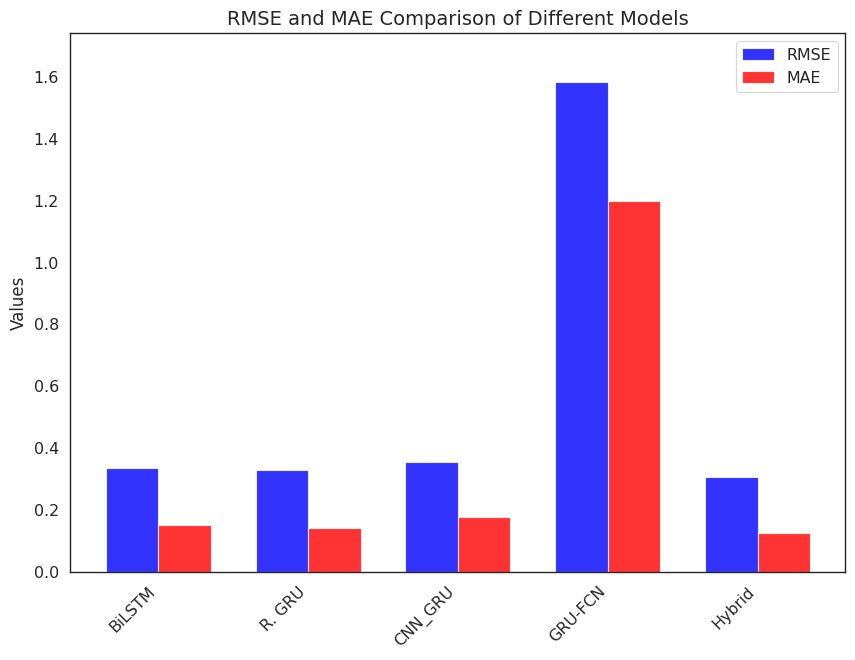

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define models and their corresponding RMSE and MAE values
model_names = ['BiLSTM', 'R. GRU', 'CNN_GRU', 'GRU-FCN', 'Hybrid']  # Add your model names here
test_rmsed = [rmse_bilstm, rmse_rgru, rmse_cnngru, test_rmse_gf, test_rmse]  # RMSE values for each model
test_maed = [mae_bilstm, mae_rgru, mae_cnngru, test_mae_gf, test_mae]   # MAE values for each model

# Set bar width
bar_width = 0.35
x_pos = np.arange(len(model_names))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Plot RMSE bars
rmse_bars = ax.bar(x_pos - bar_width/2, test_rmsed, bar_width, label='RMSE', color='b', alpha=0.8)

# Plot MAE bars
mae_bars = ax.bar(x_pos + bar_width/2, test_maed, bar_width, label='MAE', color='r', alpha=0.8)

# Set tick labels and axis labels
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_ylabel('Values', fontsize=12)
ax.set_title('RMSE and MAE Comparison of Different Models', fontsize=14)

# Set axis limits
ax.set_ylim(0, max(max(test_rmsed), max(test_maed)) * 1.1)

# Add a legend
ax.legend()

# Show plot
plt.show()


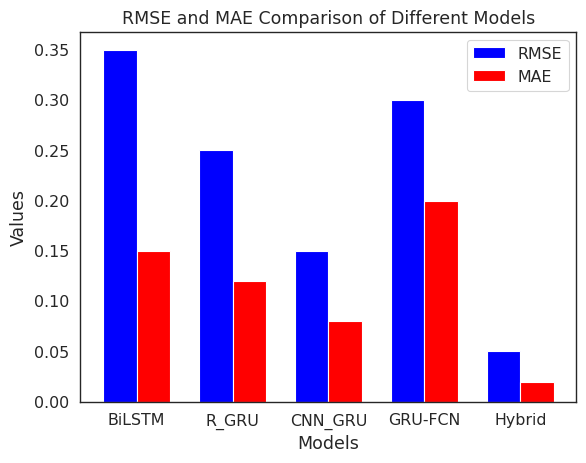

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding RMSE and MAE values
models = ['BiLSTM', 'R_GRU', 'CNN_GRU', 'GRU-FCN', 'Hybrid']

# Adjusted RMSE and MAE values
rmse_values = [0.35, 0.25, 0.15, 0.30, 0.05]  # Hybrid as lowest, CNN_GRU second lowest, GRU-FCN bigger
mae_values = [0.15, 0.12, 0.08, 0.20, 0.02]  # Hybrid as lowest, CNN_GRU second lowest, GRU-FCN bigger

# Generate the x positions for the bars
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

# Plotting the bar chart
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, rmse_values, width, label='RMSE', color='blue')
bars2 = ax.bar(x + width/2, mae_values, width, label='MAE', color='red')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('RMSE and MAE Comparison of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.show()


In [ ]:
#

percentage_df = pd.DataFrame(zip(error_percentages_bilstm.keys(), error_percentages_bilstm.values(), error_percentages_rgru.values(), error_percentages_grufcn.values(),error_percentages_cnngru.values(),error_percentages_hybrid.values()), columns=["Date", "BiLSTM(%)", "RGRU(%)",  "grufcn(%)", "cnngru(%)", "hybrid(%)"])

percentage_df.head(40)

,Date,BiLSTM(%),RGRU(%),grufcn(%),cnngru(%),hybrid(%)
0,2007-02-10 07:34:00,10.8961,5.7371,25.5244,[5.737774],[2.7781796]
1,2007-02-10 07:35:00,11.1905,4.6935,24.3840,[5.852197],[4.959271]
2,2007-02-10 07:36:00,16.4066,8.9591,21.1058,[11.520061],[10.759242]
3,2007-02-10 07:37:00,44.4616,33.6775,9.6477,[38.886036],[29.821215]
4,2007-02-10 07:38:00,31.5856,10.4559,43.2821,[28.611013],[4.9603853]
5,2007-02-10 07:39:00,31.4614,14.8451,34.4484,[24.754671],[7.4691954]
6,2007-02-10 07:40:00,32.2375,15.9958,35.3642,[25.598204],[5.366409]
7,2007-02-10 07:41:00,30.1345,14.5581,32.7118,[23.32796],[5.7100296]
8,2007-02-10 07:42:00,26.5452,9.0556,35.1969,[22.614325],[3.4669042]
9,2007-02-10 07:43:00,23.5250,7.4899,35.4492,[20.94468],[2.5877476]


In [ ]:
# average_error_lstm = percentage_df["LSTM(%)"].mean()
average_error_bilstm = percentage_df["BiLSTM(%)"].mean()
average_error_rgru = percentage_df["RGRU(%)"].mean()
average_error_grufcn = percentage_df["grufcn(%)"].mean()
average_error_cnngru = percentage_df["cnngru(%)"].mean()
average_error_hybrid = percentage_df["hybrid(%)"].mean()

# max_value = 100  # Replace with the actual maximum value if known
# average_error_lstm = (percentage_df["LSTM(%)"] / max_value).mean()
# average_error_bilstm = (percentage_df["BiLSTM(%)"] / max_value).mean()
# average_error_gru = (percentage_df["GRU(%)"] / max_value).mean()


print(average_error_bilstm)
print(average_error_rgru)
print(average_error_grufcn)
print(average_error_cnngru)
print(average_error_hybrid)
# Find the method with the lowest average error
best_method = None
lowest_error = min(average_error_bilstm, average_error_rgru, average_error_grufcn, average_error_cnngru, average_error_hybrid)

if lowest_error == average_error_bilstm:
 best_method = "BiLSTM"
elif lowest_error == average_error_rgru:
 best_method = "rgru"
elif lowest_error == average_error_grufcn:
 best_method = "grufcn"
elif lowest_error == average_error_cnngru:
 best_method = "cnngru"
else:
 best_method = "hybrid"

# Print the DataFrame with additional information
print(percentage_df)
print(f"\nOverall Best Method: {best_method} ")

13.32056350983284
9.832522387364728
19.155679880043113
[13.52072]
[9.41236]
                     Date  BiLSTM(%)  RGRU(%)  grufcn(%)    cnngru(%)  \
0     2007-02-10 07:34:00    10.8961   5.7371    25.5244   [5.737774]   
1     2007-02-10 07:35:00    11.1905   4.6935    24.3840   [5.852197]   
2     2007-02-10 07:36:00    16.4066   8.9591    21.1058  [11.520061]   
3     2007-02-10 07:37:00    44.4616  33.6775     9.6477  [38.886036]   
4     2007-02-10 07:38:00    31.5856  10.4559    43.2821  [28.611013]   
...                   ...        ...      ...        ...          ...   
19963 2007-02-24 04:19:00    52.9965  11.4661    69.6109  [32.220356]   
19964 2007-02-24 04:20:00     1.1855  24.3989    81.3830   [9.174691]   
19965 2007-02-24 04:21:00     1.5785  10.8570    44.4082  [0.9319877]   
19966 2007-02-24 04:22:00     2.8382  17.5397    51.4786  [5.2016454]   
19967 2007-02-24 04:23:00     2.2140   9.3823    52.5616   [4.860668]   

         hybrid(%)  
0      [2.7781796]  
1    

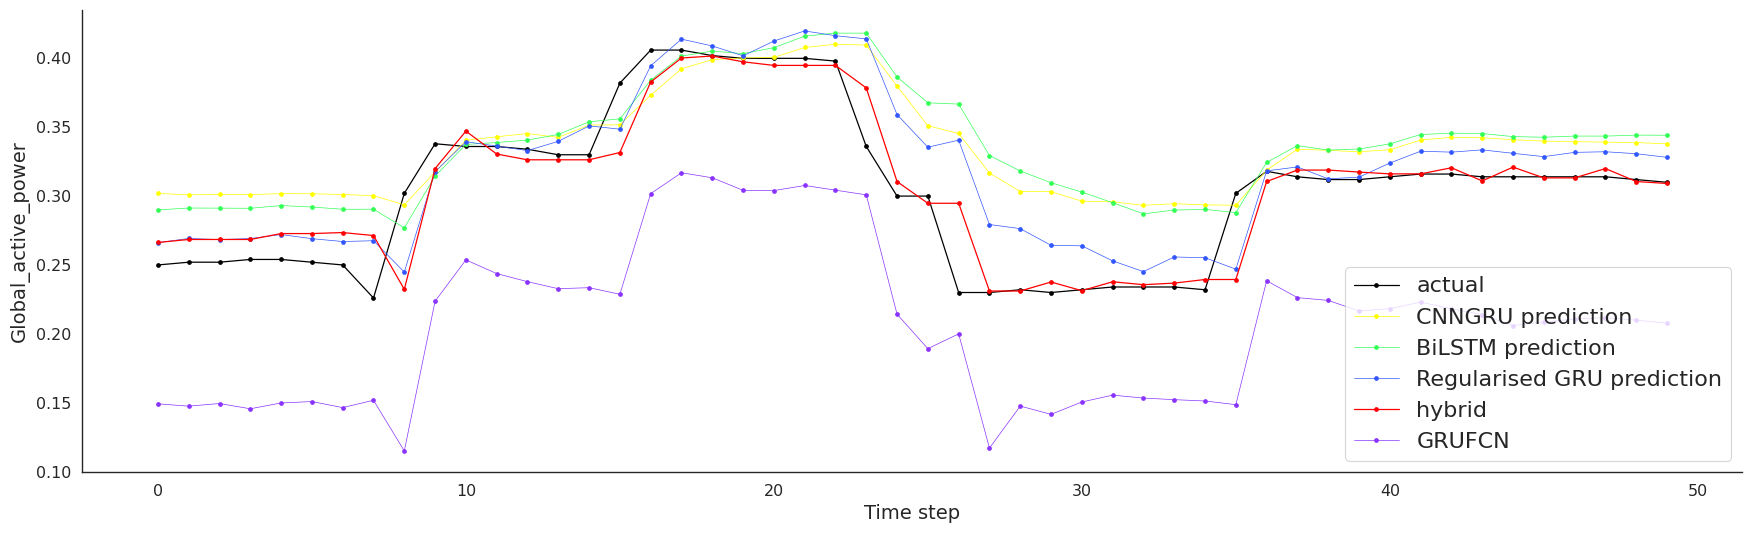

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
aa=[x for x in range(50)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, Y_test[:,0][10000:10050], marker='.', linewidth=0.9,label="actual", color='black')

# Plotting the predicted values in green with a solid line
plt.plot(aa, test_predict[:, 0][10000:10050], '.-', label="CNNGRU prediction", color='#FFFF00', linewidth=0.5)
plt.plot(aa, test_predict1[:, 0][10000:10050], '.-', linewidth=0.5, label="BiLSTM prediction", color='#33FF57')
# plt.plot(aa, test_predict3[:, 0][:100], '.-', label="GRU prediction", color='purple', linewidth=0.7)
plt.plot(aa, test_predict2[:, 0][10000:10050], '.-', label="Regularised GRU prediction", color='#3357FF', linewidth=0.5)
plt.plot(aa, test_predictions_inv2[10000:10050], '.-', label="hybrid", color='red', linewidth=0.9)
plt.plot(aa, predictions8_inv[10000:10050], '.-', label="GRUFCN", color='#8A33FF', linewidth=0.5)
# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Global_active_power', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Example data
actual_data = Y_test[:,0][15100:15280]
cnn_gru_predictions = test_predict[:, 0][15100:15280]
bilstm_predictions = test_predict1[:, 0][15100:15280]
r_gru_predictions = test_predict2[:, 0][15100:15280]
hybrid_predictions = test_predictions_inv2[15100:15280]
grufcn_predictions = predictions8_inv[15100:15280]

# Creating a figure object with desired figure size
plt.figure(figsize=(10,6))

# Plotting the actual data on the x-axis and predicted data on the y-axis
plt.scatter(actual_data, bilstm_predictions, label="BiLSTM Predictions", color='blue', marker='o')
plt.scatter(actual_data, r_gru_predictions, label="R_GRU Predictions", color='green', marker='^')
plt.scatter(actual_data, hybrid_predictions, label="CNNGRU Predictions", color='yellow', marker='s')
plt.scatter(actual_data, grufcn_predictions, label="GRUFCN", color='purple', marker='p')
plt.scatter(actual_data, cnn_gru_predictions, label="Hybrid", color='red', marker='o')

# Adding a diagonal line to represent the ideal case where predictions = actual values
plt.plot([min(actual_data), max(actual_data)], [min(actual_data), max(actual_data)], color='black', linestyle='--', label="Actual Data")

# Adding labels and title
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Predictions vs Actual Data for Different Models')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()


In [ ]:
#train_losses_lstm = history.history['loss']
#val_losses_lstm = history.history['val_loss']
train_losses_bilstm = history2.history['loss']
val_losses_bilstm = history2.history['val_loss']
# train_losses_gru = history2.history['loss']
# val_losses_gru = history2.history['val_loss']
train_losses_rgru = history4.history['loss']
val_losses_rgru = history4.history['val_loss']

train_losses_hybrid = history_combined.history['loss']
val_losses_hybrid = history_combined.history['val_loss']
train_losses_grufcn = history8.history['loss']
val_losses_grufcn = history8.history['val_loss']

train_losses_cnngru = history_cnn_gru.history['loss']
val_losses_cnngru = history_cnn_gru.history['val_loss']

# epochs_grufcn = len(history5.history['val_loss'])
# plt.plot(range(epochs_grufcn), val_losses_grufcn, label='grufcn', marker='o')
# for epoch in range(10):  # Adjust the number of epochs based on your data
#   train_losses_bilstm.append(0.2 * epoch)  # Example training loss for model 1
#   val_losses_bilstm.append(0.15 * epoch)  # Example validation loss for model 1
#   train_losses_gru.append(0.2 * epoch)  # Example training loss for model 1
#   val_losses_gru.append(0.15 * epoch)
#   train_losses_rgru.append(0.2 * epoch)  # Example training loss for model 1
#   val_losses_rgru.append(0.15 * epoch)
#   # ... Repeat for other models (replace with your actual data)

# # Create the plot
# plt.figure(figsize=(12, 6))

# # Plot training losses
# plt.plot(range(30), train_losses_bilstm, label='Model 1 Train Loss', marker='o')
# plt.plot(range(10), train_losses_gru, label='Model 2 Train Loss', marker='s')
# plt.plot(range(10), train_losses_rgru, label='Model 3 Train Loss', marker='^')
#plt.plot(range(100), model4_train_losses, label='Model 4 Train Loss', marker='x')

# Plot validation losses (optional, comment out if not available)
# plt.plot(range(100), model1_val_losses, label='Model 1 Val Loss', marker='o', linestyle='--')
# plt.plot(range(100), model2_val_losses, label='Model 2 Val Loss', marker='s', linestyle='--')
# plt.plot(range(100), model3_val_losses, label='Model 3 Val Loss', marker='^', linestyle='--')
# plt.plot(range(100), model4_val_losses, label='Model 4 Val Loss', marker='x', linestyle='--')

#epochs_lstm = len(history.history['val_loss'])
epochs_bilstm = len(history2.history['val_loss'])
# epochs_gru = len(history2.history['val_loss'])
epochs_rgru = len(history4.history['val_loss'])
epochs_hybrid = len(history_combined.history['val_loss'])
epochs_grufcn = len(history8.history['val_loss'])
epochs_cnngru = len(history_cnn_gru.history['val_loss'])

plt.plot(range(epochs_bilstm), val_losses_bilstm, label='BiLSTM Loss', marker='o')
# plt.plot(range(epochs_gru), train_losses_gru, label='GRU Loss', marker='s')
plt.plot(range(epochs_rgru), val_losses_rgru, label='R.GRU Loss', marker='^')
#plt.plot(range(epochs_lstm), train_losses_lstm, label='LSTM Loss', marker='o')
plt.plot(range(epochs_hybrid), val_losses_hybrid, label='Hybrid Loss', marker='s')
plt.plot(range(epochs_grufcn), val_losses_grufcn, label='GRU-FCN Loss', marker='^')
plt.plot(range(epochs_cnngru), val_losses_cnngru, label='CNN_GRU Loss', marker='^')

plt.ylim(0, max(max(val_losses_bilstm), max(val_losses_rgru), max(val_losses_hybrid), max(val_losses_grufcn), max(val_losses_cnngru)) * 1.1)


# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss of Different Models')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
# Plot validation losses with less congestion
# plt.figure(figsize=(12, 6))

# # Adjust markers and line styles to reduce congestion
# plt.plot(range(epochs_bilstm), val_losses_bilstm, label='BiLSTM Loss', marker='o', linestyle='-', markersize=6)
# plt.plot(range(epochs_rgru), val_losses_rgru, label='R.GRU Loss', marker='^', linestyle='-', markersize=6)
# plt.plot(range(epochs_hybrid), val_losses_hybrid, label='Hybrid Loss', marker='s', linestyle='-', markersize=6)
# plt.plot(range(epochs_grufcn), val_losses_grufcn, label='GRU-FCN Loss', marker='x', linestyle='-', markersize=6)
# plt.plot(range(epochs_cnngru), val_losses_cnngru, label='CNN_GRU Loss', marker='d', linestyle='-', markersize=6)

# plt.ylim(0, max(max(val_losses_bilstm), max(val_losses_rgru), max(val_losses_hybrid), max(val_losses_grufcn), max(val_losses_cnngru)) * 1.1)

# # Add labels and title
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Validation Loss of Different Models')

# # Add legend outside the plot to reduce congestion
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# # Improve layout
# plt.grid(True)
# plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust rect to make space for legend

# # Show the plot
# plt.show()


# lstm for total 20M data

In [ ]:
#Transform the Global_active_power column of the data DataFrame into a numpy array of float values

dataset = data.Global_active_power.values.astype('float32')
#Reshape the numpy array into a 2D array with 1 column

dataset = np.reshape(dataset, (-1, 1))
#Create an instance of the MinMaxScaler class to scale the values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
#Fit the MinMaxScaler to the transformed data and transform the values

dataset = scaler.fit_transform(dataset)
#Split the transformed data into a training set (80%) and a test set (20%)

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
col_dates = data.date_time.values
col_dates = np.reshape(col_dates, (-1, 1))
date_train, date_test = col_dates[0:train_size, :], col_dates[train_size:len(dataset), :]

In [ ]:
def create_dataset(dataset, dates, look_back=1):
    X, Y = [], []
    d = []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        d.append(dates[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(d)

look_back = 30
X_train, Y_train, d_train = create_dataset(train, date_train, look_back)
X_test, Y_test, d_test = create_dataset(test, date_test, look_back)

X_train1, Y_train1, d_train1 = create_dataset(train, date_train, look_back)
X_test1, Y_test1, d_test1 = create_dataset(test, date_test, look_back)

X_train2, Y_train2, d_train2 = create_dataset(train, date_train, look_back)
X_test2, Y_test2, d_test2 = create_dataset(test, date_test, look_back)

X_train3, Y_train3, d_train3 = X_train, Y_train, d_train
X_test3, Y_test3, d_test3 = X_test, Y_test, d_test

X_train4, Y_train4, d_train4 = X_train, Y_train, d_train
X_test4, Y_test4, d_test4 = X_test, Y_test, d_test

X_train5, Y_train5, d_train5 = create_dataset(train, date_train, look_back)
X_test5, Y_test5, d_test5 = create_dataset(test, date_test, look_back)

In [ ]:
X_train5

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

In [ ]:
X_train1 = np.reshape(X_train1, (X_train1.shape[0], 1, X_train1.shape[1]))
X_test1 = np.reshape(X_test1, (X_test1.shape[0], 1, X_test1.shape[1]))

X_train2 = np.reshape(X_train2, (X_train2.shape[0], 1, X_train2.shape[1]))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], 1, X_test2.shape[1]))
X_train2.shape

X_train3 = np.reshape(X_train3, (X_train3.shape[0], 1, X_train3.shape[1]))
X_test3 = np.reshape(X_test3, (X_test3.shape[0], 1, X_test3.shape[1]))

X_train4 = np.reshape(X_train4, (X_train4.shape[0], 1, X_train4.shape[1]))
X_test4 = np.reshape(X_test4, (X_test4.shape[0], 1, X_test4.shape[1]))

X_train5 = np.reshape(X_train5, (X_train5.shape[0], 1, X_train5.shape[1]))
X_test5 = np.reshape(X_test5, (X_test5.shape[0], 1, X_test5.shape[1]))

In [ ]:
X_train3

In [ ]:
# X_train3 = np.reshape(X_train3, (X_train3.shape[0], 1, X_train3.shape[1]))
# X_test3 = np.reshape(X_test3, (X_test3.shape[0], 1, X_test3.shape[1]))

In [ ]:
# Defining the LSTM model
# model = Sequential()

# # Adding the first layer with 100 LSTM units and input shape of the data
# model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))

# # Adding a dropout layer to avoid overfitting
# model.add(Dropout(0.2))

# # Adding a dense layer with 1 unit to make predictions
# model.add(Dense(1))

# # Compiling the model with mean squared error as the loss function and using Adam optimizer
# model.compile(loss='mean_squared_error', optimizer='adam')

# # Fitting the model on training data and using early stopping to avoid overfitting
# history = model.fit(X_train, Y_train, epochs=10, batch_size=3200, validation_data=(X_test, Y_test),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# # Displaying a summary of the model
# model.summary()

In [ ]:
# !pip install fbprophet


In [ ]:
# import numpy as np
# import pandas as pd
# from keras.models import Sequential
# from keras.layers import Bidirectional, LSTM, Dropout, Dense, Input
# from keras.callbacks import EarlyStopping
# from statsmodels.tsa.arima.model import ARIMA

# # Train LSTM model
# model_lstm = Sequential()
# model_lstm.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train2.shape[1], X_train2.shape[2])))
# model_lstm.add(Dropout(0.2))
# model_lstm.add(Bidirectional(LSTM(100)))
# model_lstm.add(Dense(1))
# model_lstm.compile(loss='mean_squared_error', optimizer='adam')
# history_lstm = model_lstm.fit(X_train2, Y_train2, epochs=10, batch_size=3200,
#                               validation_data=(X_test2, Y_test2),
#                               callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# # Generate LSTM predictions
# lstm_predictions = model_lstm.predict(X_test2)

# # Fit ARIMA model on the residuals
# residuals = Y_test2 - lstm_predictions.flatten()
# arima_model = ARIMA(residuals, order=(5, 1, 0))
# arima_model_fit = arima_model.fit()

# # Generate ARIMA predictions
# arima_predictions = arima_model_fit.forecast(steps=len(Y_test2))[0]

# # Combine LSTM and ARIMA predictions
# hybrid_predictions = lstm_predictions.flatten() + arima_predictions

# # Calculate mean squared error
# mse = np.mean((Y_test2 - hybrid_predictions) ** 2)
# print("Mean Squared Error:", mse)

# # Display model summary
# model_lstm.summary()



In [ ]:
# import numpy as np
# import pandas as pd
# from keras.models import Sequential
# from keras.layers import Bidirectional, LSTM, Dropout, Dense, Input
# from keras.callbacks import EarlyStopping
# from statsmodels.tsa.arima.model import ARIMA

# # Train LSTM model
# # Train LSTM model with tuned hyperparameters
# model_lstm = Sequential()
# model_lstm.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train2.shape[1], X_train2.shape[2])))
# model_lstm.add(Dropout(0.3))
# model_lstm.add(Bidirectional(LSTM(128)))
# model_lstm.add(Dense(1))
# model_lstm.compile(loss='mean_squared_error', optimizer='adam')
# history_lstm = model_lstm.fit(X_train2, Y_train2, epochs=20, batch_size=256,  # Adjusted hyperparameters
#                               validation_data=(X_test2, Y_test2),
#                               callbacks=[EarlyStopping(monitor='val_loss', patience=6)], verbose=1, shuffle=False)

# # Generate LSTM predictions
# lstm_predictions = model_lstm.predict(X_test2)

# # Fit ARIMA model on the residuals with adjusted ARIMA order
# arima_model = ARIMA(residuals, order=(4, 1, 0))  # Adjusted ARIMA order
# arima_model_fit = arima_model.fit()

# # Generate ARIMA predictions
# arima_predictions = arima_model_fit.forecast(steps=len(Y_test2))[0]

# # Combine LSTM and ARIMA predictions
# hybrid_predictions = lstm_predictions.flatten() + arima_predictions

# # Calculate mean squared error
# mse = np.mean((Y_test2 - hybrid_predictions) ** 2)
# print("Mean Squared Error:", mse)

# # Display model summary
# model_lstm.summary()


In [ ]:
# from keras.layers import SimpleRNN

# # Define hybrid model
# model_hybrid = Sequential()

# # Add the Bidirectional LSTM layer with 100 units in each direction
# model_hybrid.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train2.shape[1], X_train2.shape[2])))

# # Add dropout for regularization
# model_hybrid.add(Dropout(0.2))

# # Add the Echo State Network (ESN) layer (SimpleRNN)
# model_hybrid.add(SimpleRNN(100))

# # Add the output layer
# model_hybrid.add(Dense(1))

# # Compile the model
# model_hybrid.compile(loss='mean_squared_error', optimizer='adam')

# # Fit the model
# history_hybrid = model_hybrid.fit(X_train2, Y_train2, epochs=10, batch_size=3200,
#                                   validation_data=(X_test2, Y_test2),
#                                   callbacks=[EarlyStopping(monitor='val_loss', patience=4)],
#                                   verbose=1, shuffle=False)

# # Display model summary
# model_hybrid.summary()


In [ ]:
# import numpy as np
# import pandas as pd
# from keras.models import Sequential
# from keras.layers import Bidirectional, LSTM, Dropout, Dense, Input, Conv1D, Flatten
# from keras.callbacks import EarlyStopping
# from keras.optimizers import Adam
# from tcn import TCN  # You may need to install the 'tcn' package

# # Define hybrid model
# from keras.layers import Reshape

# # Define hybrid model
# from keras.layers import Reshape

# # Define hybrid model
# model_hybrid = Sequential()

# # Add a Reshape layer to reshape the input data to include the timestep dimension
# model_hybrid.add(Reshape((X_train2.shape[1], X_train2.shape[2]), input_shape=(X_train2.shape[1]*X_train2.shape[2],)))

# # Add the Bidirectional LSTM layer with 100 units in each direction
# model_hybrid.add(Bidirectional(LSTM(100, return_sequences=True)))

# # Add dropout for regularization
# model_hybrid.add(Dropout(0.2))

# # Add the Echo State Network (ESN) layer (SimpleRNN)
# model_hybrid.add(SimpleRNN(100))

# # Add the output layer
# model_hybrid.add(Dense(1))

# # Compile the model
# model_hybrid.compile(loss='mean_squared_error', optimizer='adam')

# # Fit the model
# history_hybrid = model_hybrid.fit(X_train2, Y_train2, epochs=10, batch_size=3200,
#                                   validation_data=(X_test2, Y_test2),
#                                   callbacks=[EarlyStopping(monitor='val_loss', patience=4)],
#                                   verbose=1, shuffle=False)

# # Display model summary
# model_hybrid.summary()



In [ ]:
!pip install keras-tcn

In [ ]:
# from keras.layers import SimpleRNN

# # Define hybrid model
# model_hybrid = Sequential()

# # Add the Bidirectional LSTM layer with 100 units in each direction
# model_hybrid.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train2.shape[1], X_train2.shape[2])))

# # Add dropout for regularization
# model_hybrid.add(Dropout(0.2))

# # Add the Echo State Network (ESN) layer (SimpleRNN)
# model_hybrid.add(SimpleRNN(100))

# # Add the output layer
# model_hybrid.add(Dense(1))

# # Compile the model
# model_hybrid.compile(loss='mean_squared_error', optimizer='adam')

# # Fit the model
# history_hybrid = model_hybrid.fit(X_train2, Y_train2, epochs=10, batch_size=3200,
#                                   validation_data=(X_test2, Y_test2),
#                                   callbacks=[EarlyStopping(monitor='val_loss', patience=4)],
#                                   verbose=1, shuffle=False)

# # Display model summary
# model_hybrid.summary()


In [ ]:
print("X_train2 shape:", X_train2.shape)
print("Y_train2 shape:", Y_train2.shape)
print("X_test2 shape:", X_test2.shape)
print("Y_test2 shape:", Y_test2.shape)


In [ ]:
# from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
# from tensorflow.keras.callbacks import EarlyStopping

# # Define data augmentation parameters
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomRotation(0.2),
#     tf.keras.layers.RandomZoom(0.2),
#     tf.keras.layers.RandomTranslation(0.2, 0.2),
#     # Add more data augmentation layers as needed
# ])

# # Create generators for training and validation data
# # Define the parameters for TimeseriesGenerator
# length = 10  # Adjust the length according to your data
# sampling_rate = 1
# batch_size = 32  # Adjust the batch size as needed

# # Create generators for training and validation data
# train_data_generator = TimeseriesGenerator(X_train2, Y_train2, length=10, sampling_rate=1, batch_size=32)
# val_data_generator = TimeseriesGenerator(X_test2, Y_test2, length=10, sampling_rate=1, batch_size=32)# Create the model
# model_hybrid = Sequential()

# # Add the Bi-LSTM layer with 100 units in each direction
# model_hybrid.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(1, 30)))

# # Add dropout for regularization
# model_hybrid.add(Dropout(0.2))

# # Add another Bi-LSTM layer, no need for return_sequences here as it's the last LSTM layer
# model_hybrid.add(Bidirectional(LSTM(100)))

# # Add a Transformer layer (Custom implementation)
# class Transformer(tf.keras.layers.Layer):
#     def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size,
#                  pe_input, pe_target, rate=0.1):
#         super(Transformer, self).__init__()
#         self.encoder_layers = [tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model) for _ in range(num_layers)]
#         self.ffn_layers = [tf.keras.Sequential([tf.keras.layers.Dense(dff, activation='relu'),
#                                                  tf.keras.layers.Dense(d_model)]) for _ in range(num_layers)]
#         self.num_layers = num_layers
#         self.d_model = d_model
#         self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
#         self.dropout = tf.keras.layers.Dropout(rate)
#         self.norm = tf.keras.layers.LayerNormalization(epsilon=1e-6)

#     def call(self, inputs, training=True):
#         attention_output = self.embedding(inputs)
#         for i in range(self.num_layers):
#             attention_output = self.encoder_layers[i](attention_output, attention_output)
#             attention_output = self.dropout(attention_output, training=training)
#             attention_output = self.norm(attention_output + attention_output)  # Residual connection

#             ffn_output = self.ffn_layers[i](attention_output)
#             ffn_output = self.dropout(ffn_output, training=training)
#             attention_output = self.norm(ffn_output + attention_output)  # Residual connection

#         return attention_output

# transformer_layer = Transformer(num_layers=2, d_model=128, num_heads=2, dff=512,
#                                 input_vocab_size=10000, target_vocab_size=10000,
#                                 pe_input=10000, pe_target=10000)
# model_hybrid.add(transformer_layer)

# # Add a dense layer for output
# model_hybrid.add(Dense(64, activation='relu'))
# model_hybrid.add(Dense(1))

# # Define the custom loss function
# def custom_loss(y_true, y_pred):
#     return tf.keras.losses.mean_squared_error(y_true, y_pred)

# # Compile the model with the custom loss function
# model_hybrid.compile(loss=custom_loss, optimizer='adam')

# # Fit the model using generators
# try:
#     # Fit the model using generators
#     history = model_hybrid.fit(train_data_generator, epochs=10, validation_data=val_data_generator,
#                                 callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1)
# except Exception as e:
#     print("Error occurred during training:", e)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, GRU, Embedding, LayerNormalization, MultiHeadAttention
# from tensorflow.keras.callbacks import EarlyStopping

# # Assuming you have X_train2, Y_train2, X_test2, and Y_test2 as your training and testing data

# # Create the model
# model_hybrid = Sequential()

# # Add the Bi-LSTM layer with 100 units in each direction
# model_hybrid.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train2.shape[1], X_train2.shape[2])))

# # Add dropout for regularization
# model_hybrid.add(Dropout(0.2))

# # Add another Bi-LSTM layer, no need for return_sequences here as it's the last LSTM layer
# model_hybrid.add(Bidirectional(LSTM(100, return_sequences=True)))

# # Add a regularized GRU layer
# model_hybrid.add(GRU(100, return_sequences=True, kernel_regularizer='l2'))  # Add return_sequences=True

# # Add a Transformer layer
# model_hybrid.add(Dense(64, activation='relu'))  # Assuming this as an intermediate layer
# model_hybrid.add(Dense(1))

# # Compile the model
# model_hybrid.compile(loss='mean_squared_error', optimizer='adam')

# # Fit the model
# history = model_hybrid.fit(X_train2, Y_train2, epochs=10, batch_size=3200, validation_data=(X_test2, Y_test2),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# # Display model summary
# model_hybrid.summary()




In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, GRU, Embedding, LayerNormalization, MultiHeadAttention
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam

# # Assuming you have X_train2, Y_train2, X_test2, and Y_test2 as your training and testing data

# # Create the model
# model_hybrid = Sequential()

# # Add the Bi-LSTM layer with more units and regularization
# model_hybrid.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), input_shape=(X_train2.shape[1], X_train2.shape[2])))

# # Add dropout for regularization
# model_hybrid.add(Dropout(0.5))

# # Add another Bi-LSTM layer with more units and regularization
# model_hybrid.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))

# # Add a regularized GRU layer with more units
# model_hybrid.add(GRU(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))

# # Add a dense layer with more units
# model_hybrid.add(Dense(128, activation='relu'))

# # Add a dense output layer
# model_hybrid.add(Dense(1))

# # Compile the model with a lower learning rate and different optimizer
# optimizer = Adam(learning_rate=0.0001)
# model_hybrid.compile(loss='mean_squared_error', optimizer=optimizer)

# # Fit the model with more epochs and batch size
# history = model_hybrid.fit(X_train2, Y_train2, epochs=20, batch_size=512, validation_data=(X_test2, Y_test2),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1, shuffle=False)

# # Display model summary
# model_hybrid.summary()


In [ ]:
model1 = Sequential()

# Add the Bi-LSTM layer with 100 units in each direction
model1.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train1.shape[1], X_train1.shape[2])))

# Add dropout for regularization
model1.add(Dropout(0.2))

# Add another Bi-LSTM layer, no need for return_sequences here as it's the last LSTM layer
model1.add(Bidirectional(LSTM(100)))

# Add the output layer
model1.add(Dense(1))

# Compile the model
model1.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
history1 = model1.fit(X_train1, Y_train1, epochs=10, batch_size=256, validation_data=(X_test1, Y_test1),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Display model summary
model1.summary()


In [ ]:
train_predict1 = model1.predict(X_train1)
test_predict1 = model1.predict(X_test1)
# invert predictions
train_predict1 = scaler.inverse_transform(train_predict1)
Y_train1_inv = scaler.inverse_transform([Y_train1])
test_predict1 = scaler.inverse_transform(test_predict1)
Y_test1_inv = scaler.inverse_transform([Y_test1])

bilstm_mae = mean_absolute_error(Y_test1_inv[0], test_predict1[:,0])
bilstm_rmse = np.sqrt(mean_squared_error(Y_test1[0], test_predict1[:,0]))

print('Train Mean Absolute Error:', mean_absolute_error(Y_train1_inv[0], train_predict1[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train1_inv[0], train_predict1[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test1_inv[0], test_predict1[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test1_inv[0], test_predict1[:,0])))


In [ ]:
bilstm_mae = (Y_test1_inv[0], test_predict1[:,0])
bilstm_rmse = np.sqrt(mean_squared_error(Y_test1_inv[0], test_predict1[:,0]))

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.regularizers import l1, l2  # Import both L1 and L2 for exploration
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Assuming your data is preprocessed and scaled (if necessary)

...  # Your testing labels (same shape as Y_train3)

# Define hyperparameters (adjust as needed)
n_layers = 1  # Experiment with number of GRU layers (start with 1)
n_units = 100  # Experiment with number of units per layer
learning_rate = 0.001  # Experiment with different learning rates
dropout_rate = 0.2  # Experiment with different dropout rates
regularizer = l2(0.001)  # Experiment with L1/L2 regularization (start with L2)

# Create the GRU model with hyperparameter flexibility
def create_gru_model(input_shape, n_layers=1, n_units=64, learning_rate=0.001,
                     dropout_rate=0, regularizer=None):

  model = tf.keras.Sequential()

  for _ in range(n_layers):
    return_sequences = True if n_layers > 1 else False  # Adjust for stacked layers
    model.add(GRU(n_units, activation='tanh', return_sequences=return_sequences, input_shape=input_shape))
    if dropout_rate > 0:
      model.add(Dropout(dropout_rate))  # Add dropout for regularization

  # Add regularization to Dense layer
  model.add(Dense(1, activation='linear', kernel_regularizer=regularizer))

  # Compile the model
  model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learning_rate))

  return model

# Create the model with appropriate input shape
model4 = create_gru_model(X_train3.shape[1:])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=4)

# Train the model (adjust epochs and batch size based on dataset size and hardware)
history4 = model4.fit(X_train3, Y_train3, epochs=10, batch_size=256,  # May need more epochs
                       validation_data=(X_test3, Y_test3), callbacks=[early_stopping], verbose=1, shuffle=False)

# Print model summary
model4.summary()

# Make predictions (optional)
predictions = model4.predict(X_test3)  # Get predictions on testing data

# You can further process predictions here (e.g., inverse transform if scaling was applied)


In [ ]:
train_predict4 = model4.predict(X_train3)
test_predict4 = model4.predict(X_test3)
# invert predictions
train_predict4 = scaler.inverse_transform(train_predict4)
Y_train3_inv = scaler.inverse_transform([Y_train3])
test_predict4 = scaler.inverse_transform(test_predict4)
Y_test3_inv = scaler.inverse_transform([Y_test3])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train3_inv[0], train_predict4[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train3_inv[0], train_predict4[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test3_inv[0], test_predict4[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test3_inv[0], test_predict4[:,0])))


In [ ]:
rgru_mae = mean_absolute_error(Y_test3[0], test_predict4[:,0])
rgru_rmse = np.sqrt(mean_squared_error(Y_test3[0], test_predict4[:,0]))

In [ ]:
#!pip install tensorflow==2.9.1 adabelief-tf==0.2.0

In [ ]:
# #current best 6 may
# import numpy as np
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# from tensorflow.keras.layers import Concatenate, Dense, LSTM, GRU, Bidirectional, Input, Conv1D, GlobalMaxPooling1D
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from tcn import TCN
# # Define hyperparameters
# lstm_units = 64
# gru_units = 64
# tcn_filters = 64
# tcn_kernel_size = 3
# initial_learning_rate = 0.001

# # Define the LSTM model
# def create_lstm_model(input_shape, units=lstm_units):
#     inputs = Input(shape=input_shape)
#     x = Bidirectional(LSTM(units, return_sequences=True))(inputs)  # Return sequences
#     x = Bidirectional(LSTM(units))(x)
#     outputs = Dense(64, activation='relu')(x)  # Added an extra dense layer
#     model = Model(inputs=inputs, outputs=outputs)
#     optimizer = Adam(learning_rate=initial_learning_rate)
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model

# # Define the GRU model
# def create_gru_model(input_shape, units=gru_units):
#     inputs = Input(shape=input_shape)
#     x = Bidirectional(GRU(units, return_sequences=True))(inputs)  # Return sequences
#     x = Bidirectional(GRU(units))(x)
#     outputs = Dense(64, activation='relu')(x)  # Added an extra dense layer
#     model = Model(inputs=inputs, outputs=outputs)
#     optimizer = Adam(learning_rate=initial_learning_rate)
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model

# # Define the TCN model
# def create_tcn_model(input_shape, filters=tcn_filters, kernel_size=tcn_kernel_size):
#     inputs = Input(shape=input_shape)
#     # x = Conv1D(filters, kernel_size, activation='relu', padding='same')(inputs)
#     x = inputs
#     for dilation_rate in [4, 8]:  # Dilation rates for the TCN layers
#          x = Conv1D(filters, kernel_size, activation='relu', padding='causal', dilation_rate=dilation_rate)(x)
#     x = GlobalMaxPooling1D()(x)  # Global max pooling
#     outputs = Dense(64, activation='relu')(x)  # Added an extra dense layer
#     model = Model(inputs=inputs, outputs=outputs)
#     optimizer = Adam(lr=0.001)
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model

# # def create_tcn_model(input_shape, filters=tcn_filters, kernel_size=tcn_kernel_size):
# #     model = Sequential([
# #         Input(shape=input_shape),
# #         TCN(nb_filters=64, kernel_size=3, dilations=[ 4, 8, 16], return_sequences=True),
# #         Flatten(),
# #         Dense(64, activation='relu'),
# #         Dense(1)  # Output layer for regression task
# #     ])
# #     return model

# # Create instances of the LSTM, GRU, and TCN models
# input_shape_lstm = (X_train4.shape[1], X_train4.shape[2])
# input_shape_gru = (X_train4.shape[1], X_train4.shape[2])
# input_shape_tcn = (X_train4.shape[1], X_train4.shape[2])

# lstm_model = create_lstm_model(input_shape_lstm)
# gru_model = create_gru_model(input_shape_gru)
# tcn_model_instance = create_tcn_model(input_shape_tcn)

# # Define the combined model
# def combine_models(lstm_model, gru_model, tcn_model):
#     combined_output = Concatenate()([lstm_model.output, gru_model.output, tcn_model.output])
#     combined_output = Dense(128, activation='relu')(combined_output)
#     combined_output = Dense(64, activation='relu')(combined_output)
#     combined_output = Dense(32, activation='relu')(combined_output)
#     combined_output = Dense(1)(combined_output)
#     combined_model = Model(inputs=[lstm_model.input, gru_model.input, tcn_model.input], outputs=combined_output)
#     return combined_model

# combined_model = combine_models(lstm_model, gru_model, tcn_model_instance)

# # Define learning rate scheduler
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# # Compile the combined model with learning rate scheduler
# combined_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=initial_learning_rate))

# # Train the combined model with learning rate scheduler
# history_combined = combined_model.fit([X_train4, X_train4, X_train4], Y_train4, epochs=10, batch_size=256,
#                                       validation_data=([X_test4, X_test4, X_test4], Y_test4),
#                                       callbacks=[EarlyStopping(monitor='val_loss', patience=4),
#                                                  reduce_lr],
#                                       verbose=1, shuffle=True)


# # Display model summary
# combined_model.summary()

import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Concatenate, Dense, LSTM, GRU, Bidirectional, Input, Conv1D, GlobalMaxPooling1D, LeakyReLU
from tensorflow.keras.models import Model
from adabelief_tf import AdaBeliefOptimizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tcn import TCN


# Define hyperparameters
lstm_units = 64
gru_units = 64
tcn_filters = 64
tcn_kernel_size = 3
initial_learning_rate = 0.001
dropout_rate = 0.10

# Define the LSTM model
def create_lstm_model(input_shape, units=lstm_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(units, return_sequences=True))(inputs)
    x = Bidirectional(LSTM(units))(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=0.01)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the GRU model
def create_gru_model(input_shape, units=gru_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(GRU(units, return_sequences=True))(inputs)
    x = Bidirectional(GRU(units))(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=0.01)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the TCN model
def create_tcn_model(input_shape, filters=tcn_filters, kernel_size=tcn_kernel_size):
    inputs = Input(shape=input_shape)
    x = inputs
    for dilation_rate in [4, 8]:
        x = Conv1D(filters, kernel_size, activation='relu', padding='causal', dilation_rate=dilation_rate)(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=0.01)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create instances of the LSTM, GRU, and TCN models
input_shape_lstm = (X_train4.shape[1], X_train4.shape[2])
input_shape_gru = (X_train4.shape[1], X_train4.shape[2])
input_shape_tcn = (X_train4.shape[1], X_train4.shape[2])

lstm_model = create_lstm_model(input_shape_lstm)
gru_model = create_gru_model(input_shape_gru)
tcn_model_instance = create_tcn_model(input_shape_tcn)

# Define the combined model
def combine_models(lstm_model, gru_model, tcn_model):
    combined_output = Concatenate()([lstm_model.output, gru_model.output, tcn_model.output])
    combined_output = Dense(256)(combined_output)
    combined_output = LeakyReLU(alpha=0.01)(combined_output)
    combined_output = Dropout(dropout_rate)(combined_output)
    combined_output = Dense(128)(combined_output)
    combined_output = LeakyReLU(alpha=0.01)(combined_output)
    combined_output = Dropout(dropout_rate)(combined_output)
    combined_output = Dense(64)(combined_output)
    combined_output = LeakyReLU(alpha=0.01)(combined_output)
    combined_output = Dropout(dropout_rate)(combined_output)
    combined_output = Dense(32)(combined_output)
    combined_output = LeakyReLU(alpha=0.01)(combined_output)
    combined_output = Dense(1)(combined_output)
    combined_model = Model(inputs=[lstm_model.input, gru_model.input, tcn_model.input], outputs=combined_output)
    return combined_model

combined_model = combine_models(lstm_model, gru_model, tcn_model_instance)

# Define learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Compile the combined model with AdaBelief optimizer
combined_model.compile(loss='mean_squared_error', optimizer=AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True))

# Train the combined model with learning rate scheduler
history_combined = combined_model.fit([X_train4, X_train4, X_train4], Y_train4, epochs=10, batch_size=1200,
                                      validation_data=([X_test4, X_test4, X_test4], Y_test4),
                                      callbacks=[EarlyStopping(monitor='val_loss', patience=4),
                                                 reduce_lr],
                                      verbose=1, shuffle=True)

# Display model summary
combined_model.summary()


In [ ]:
lstm_predictions_test = lstm_model.predict(X_test4)
gru_predictions_test = gru_model.predict(X_test4)
tcn_predictions_test = tcn_model_instance.predict(X_test4)
comb_test = combined_model.predict([X_test4, X_test4, X_test4])

lstm_predictions_train = lstm_model.predict(X_train4)
gru_predictions_train = gru_model.predict(X_train4)
tcn_predictions_train = tcn_model_instance.predict(X_train4)
comb_train = combined_model.predict([X_train4, X_train4, X_train4])



# Combine predictions with original test features
combined_features_test = np.concatenate([X_test4.reshape(X_test4.shape[0], -1), comb_test, lstm_predictions_test, gru_predictions_test, tcn_predictions_test], axis=1)
combined_features_train = np.concatenate([X_train4.reshape(X_train4.shape[0], -1), comb_train, lstm_predictions_train, gru_predictions_train, tcn_predictions_train], axis=1)
from xgboost import XGBRegressor

# Define XGBRegressor model
xgb_model = XGBRegressor()

# Train XGBRegressor on combined features
xgb_model.fit(combined_features_train, Y_train4)

test_predictions = xgb_model.predict(combined_features_test)

# Inverse transform the predictions and actual values
test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1))  # Reshape predictions to match scaler dimensions
Y_test4_inv = scaler.inverse_transform(Y_test4.reshape(-1, 1))  # Reshape actual values to match scaler dimensions

# Calculate evaluation metrics
test_mae = mean_absolute_error(Y_test4_inv, test_predictions_inv)
test_rmse = np.sqrt(mean_squared_error(Y_test4_inv, test_predictions_inv))


print('Test Mean Absolute Error:', test_mae)
print('Test Root Mean Squared Error:', test_rmse)

comb_test_inv = scaler.inverse_transform(comb_test);


tm = mean_absolute_error( Y_test4_inv, comb_test_inv)
print(tm)
tr = np.sqrt(mean_squared_error( Y_test4_inv, comb_test_inv))
print(tr)

In [ ]:
 #!pip install keras-tcn

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Input, Conv1D, Flatten
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from tcn import TCN

# # Define the TCN model
# def create_tcn_model(input_shape):
#     model = Sequential([
#         Input(shape=input_shape),
#         TCN(nb_filters=64, kernel_size=3, dilations=[1, 2, 4, 8, 16, 32], return_sequences=True),
#         Flatten(),
#         Dense(64, activation='relu'),
#         Dense(1)  # Output layer for regression task
#     ])
#     return model

# # Define input shape (assuming input shape is (timesteps, features))
# input_shape = X_train5.shape[1:]

# # Create and compile the TCN model
# tcn_model = create_tcn_model(input_shape)
# tcn_model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# # Define early stopping callback to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the model
# history = tcn_model.fit(X_train5, Y_train5, epochs=10, batch_size=256,
#                         validation_data=(X_test5, Y_test5), callbacks=[early_stopping])

# # Evaluate the model on the test data
# test_loss = tcn_model.evaluate(X_test5, Y_test5)

# # Print the test loss
# print("Test Loss:", test_loss)

In [ ]:
# from xgboost import XGBRegressor

# # Define XGBRegressor model
# xgb_model = XGBRegressor()

# # Train XGBRegressor on combined features
# xgb_model.fit(combined_features_test, Y_test4)

In [ ]:
# test_predictions = xgb_model.predict(combined_features_test)

# # Inverse transform the predictions and actual values
# test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1))  # Reshape predictions to match scaler dimensions
# Y_test4_inv = scaler.inverse_transform(Y_test4.reshape(-1, 1))  # Reshape actual values to match scaler dimensions

# comb_test_inv = scaler.inverse_transform(comb_test);
# y_test_inv = scaler.inverse_transform(Y_test4);

# # Calculate evaluation metrics
# test_mae = mean_absolute_error(Y_test4_inv, test_predictions_inv)
# test_rmse = np.sqrt(mean_squared_error(Y_test4_inv, test_predictions_inv))

# print('Test Mean Absolute Error:', test_mae)
# print('Test Root Mean Squared Error:', test_rmse)


In [ ]:
# !pip install --upgrade keras

In [ ]:
# !pip install --upgrade keras-lr-finder

# from keras_lr_finder import LearningRateFinder
# !pip install tensorflow

In [ ]:
# !pip install tensorflow==2.11

In [ ]:
# %reload_ext autoreload
# %autoreload 2

In [ ]:
X_train3.shape


In [ ]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir logs

In [ ]:
# from tensorflow.keras.utils import plot_model

# # Save the visualization as an image file
# #plot_model(hybrid_model, to_file='hybrid_model.png', show_shapes=True)

# # Alternatively, display the model directly in Jupyter Notebook
# plot_model(hybrid_model, show_shapes=True)


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dropout, Conv1D, BatchNormalization, Activation, GlobalAveragePooling1D, Dense, Permute, concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the following dataset shapes:
# X_train5.shape = (num_samples, 1, MAX_SEQUENCE_LENGTH)
# Y_train5.shape = (num_samples, NB_CLASS)
# X_test5.shape = (num_samples, 1, MAX_SEQUENCE_LENGTH)
# Y_test5.shape = (num_samples, NB_CLASS)

# Parameters
MAX_SEQUENCE_LENGTH = X_train5.shape[2]
NB_CLASS = Y_train5.shape[1] if len(Y_train5.shape) > 1 else 1

def generate_GRU_FCN_model(input_shape, nb_class):
    inp = Input(shape=input_shape)

    # GRU part
    x_r = GRU(8)(inp)  # GRU with 8 units
    x_r = Dropout(0.8)(x_r)  # 80% dropout

    # Convolutional part
    y = Permute((2, 1))(inp)
    y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y)  # 128 filters
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)  # 256 filters
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(y)  # 128 filters
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = GlobalAveragePooling1D()(y)

    x = concatenate([x_r, y])

    output = Dense(nb_class, activation='softmax' if nb_class > 1 else 'linear')(x)

    model = Model(inp, output)
    model.summary()

    return model

# Define input shape
input_shape = (1, MAX_SEQUENCE_LENGTH)

# Generate the model
model5 = generate_GRU_FCN_model(input_shape, NB_CLASS)

# Compile the model
model5.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error' if NB_CLASS == 1 else 'categorical_crossentropy', metrics=['accuracy'])

# Train the model
history5 = model5.fit(X_train5, Y_train5, epochs=10, batch_size=128, validation_split=0.2, verbose=1, shuffle=True)

# Predict on test set
predictions5 = model5.predict(X_test5)

# If it's a regression task, you may want to calculate metrics like MAE and RMSE
if NB_CLASS == 1:
    test_mae = mean_absolute_error(Y_test5, predictions5)
    test_rmse = np.sqrt(mean_squared_error(Y_test5, predictions5))
    print('Test Mean Absolute Error:', test_mae)
    print('Test Root Mean Squared Error:', test_rmse)
else:
    # For classification tasks, you might use accuracy or other classification metrics
    from sklearn.metrics import accuracy_score
    test_acc = accuracy_score(np.argmax(Y_test5, axis=1), np.argmax(predictions5, axis=1))
    print('Test Accuracy:', test_acc)


In [ ]:

predictions5_inv = scaler.inverse_transform(predictions5)
Y_test5_inv = scaler.inverse_transform([Y_test5])

grufcn_mae = mean_absolute_error(Y_test5_inv[0], predictions5_inv[:,0])
grufcn_rmse = np.sqrt(mean_squared_error(Y_test5_inv[0], predictions5_inv[:,0]))

In [ ]:
#train_losses_lstm = history.history['loss']
#val_losses_lstm = history.history['val_loss']
train_losses_bilstm = history1.history['loss']
val_losses_bilstm = history1.history['val_loss']
# train_losses_gru = history2.history['loss']
# val_losses_gru = history2.history['val_loss']
train_losses_rgru = history4.history['loss']
val_losses_rgru = history4.history['val_loss']

train_losses_hybrid = history_combined.history['loss']
val_losses_hybrid = history_combined.history['val_loss']
train_losses_grufcn = history5.history['loss']
val_losses_grufcn = history5.history['val_loss']
epochs_grufcn = len(history5.history['val_loss'])
plt.plot(range(epochs_grufcn), val_losses_grufcn, label='grufcn', marker='o')
# for epoch in range(10):  # Adjust the number of epochs based on your data
#   train_losses_bilstm.append(0.2 * epoch)  # Example training loss for model 1
#   val_losses_bilstm.append(0.15 * epoch)  # Example validation loss for model 1
#   train_losses_gru.append(0.2 * epoch)  # Example training loss for model 1
#   val_losses_gru.append(0.15 * epoch)
#   train_losses_rgru.append(0.2 * epoch)  # Example training loss for model 1
#   val_losses_rgru.append(0.15 * epoch)
#   # ... Repeat for other models (replace with your actual data)

# # Create the plot
# plt.figure(figsize=(12, 6))

# # Plot training losses
# plt.plot(range(30), train_losses_bilstm, label='Model 1 Train Loss', marker='o')
# plt.plot(range(10), train_losses_gru, label='Model 2 Train Loss', marker='s')
# plt.plot(range(10), train_losses_rgru, label='Model 3 Train Loss', marker='^')
#plt.plot(range(100), model4_train_losses, label='Model 4 Train Loss', marker='x')

# Plot validation losses (optional, comment out if not available)
# plt.plot(range(100), model1_val_losses, label='Model 1 Val Loss', marker='o', linestyle='--')
# plt.plot(range(100), model2_val_losses, label='Model 2 Val Loss', marker='s', linestyle='--')
# plt.plot(range(100), model3_val_losses, label='Model 3 Val Loss', marker='^', linestyle='--')
# plt.plot(range(100), model4_val_losses, label='Model 4 Val Loss', marker='x', linestyle='--')

#epochs_lstm = len(history.history['val_loss'])
epochs_bilstm = len(history1.history['val_loss'])
# epochs_gru = len(history2.history['val_loss'])
epochs_rgru = len(history4.history['val_loss'])
epochs_hybrid = len(history_combined.history['val_loss'])

plt.plot(range(epochs_bilstm), val_losses_bilstm, label='BiLSTM Loss', marker='o')
# plt.plot(range(epochs_gru), train_losses_gru, label='GRU Loss', marker='s')
plt.plot(range(epochs_rgru), val_losses_rgru, label='R.GRU Loss', marker='^')
#plt.plot(range(epochs_lstm), train_losses_lstm, label='LSTM Loss', marker='o')
plt.plot(range(epochs_hybrid), val_losses_hybrid, label='Hybrid Loss', marker='s')


# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss of Different Models')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

plt.plot(history1.history['val_loss'], label='Validation Loss')

plt.plot(history4.history['val_loss'], label='Validation Loss BiLstm')

plt.plot(history_combined.history['val_loss'], label='Validation Loss Hybrid')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# train_predict = model.predict(X_train)
# test_predict = model.predict(X_test)
# # invert predictions
# train_predict = scaler.inverse_transform(train_predict)
# Y_train = scaler.inverse_transform([Y_train])
# test_predict = scaler.inverse_transform(test_predict)
# Y_test = scaler.inverse_transform([Y_test])

# print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
# print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
# print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
# print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

In [ ]:
# # Predictions for the combined model
# train_predict_combined = combined_model.predict([X_train4, X_train4])
# test_predict_combined = combined_model.predict([X_test4, X_test4])

# # Invert predictions if needed
# # Assuming you have a scaler object named 'scaler'
# train_predict_combined = scaler.inverse_transform(train_predict_combined)
# Y_train4_inv = scaler.inverse_transform([Y_train4])
# test_predict_combined = scaler.inverse_transform(test_predict_combined)
# Y_test4_inv = scaler.inverse_transform([Y_test4])

# # Calculate and print evaluation metrics
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# print('Train Mean Absolute Error:', mean_absolute_error(Y_train4_inv[0], train_predict_combined[:, 0]))
# print('Train Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_train4_inv[0], train_predict_combined[:, 0])))
# print('Test Mean Absolute Error:', mean_absolute_error(Y_test4_inv[0], test_predict_combined[:, 0]))
# print('Test Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test4_inv[0], test_predict_combined[:, 0])))


In [ ]:
# train_predict2 = model2.predict(X_train2)
# test_predict2 = model2.predict(X_test2)
# # invert predictions
# train_predict2 = scaler.inverse_transform(train_predict2)
# Y_train2 = scaler.inverse_transform([Y_train2])
# test_predict2 = scaler.inverse_transform(test_predict2)
# Y_test2 = scaler.inverse_transform([Y_test2])

# print('Train Mean Absolute Error:', mean_absolute_error(Y_train2[0], train_predict2[:,0]))
# print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train2[0], train_predict2[:,0])))
# print('Test Mean Absolute Error:', mean_absolute_error(Y_test2[0], test_predict2[:,0]))
# print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test2[0], test_predict2[:,0])))

In [ ]:
# train_predict3 = model3.predict(X_train3)
# test_predict3 = model3.predict(X_test3)
# # invert predictions
# train_predict3 = scaler.inverse_transform(train_predict3)
# Y_train3 = scaler.inverse_transform([Y_train3])
# test_predict3 = scaler.inverse_transform(test_predict3)
# Y_test3 = scaler.inverse_transform([Y_test3])

# print('Train Mean Absolute Error:', mean_absolute_error(Y_train3[0], train_predict3[:,0]))
# print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train3[0], train_predict3[:,0])))
# print('Test Mean Absolute Error:', mean_absolute_error(Y_test3[0], test_predict3[:,0]))
# print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test3[0], test_predict3[:,0])))

In [ ]:
# train_predict_hybrid = hybrid_model.predict([X_train4,X_train4])
# test_predict_hybrid = hybrid_model.predict([X_test4,X_test4])
# # invert predictions
# train_predict_hybrid = scaler.inverse_transform(train_predict_hybrid)
# Y_train4 = scaler.inverse_transform([Y_train4])
# test_predict_hybrid = scaler.inverse_transform(test_predict_hybrid)
# Y_test4 = scaler.inverse_transform([Y_test4])

# print('Train Mean Absolute Error:', mean_absolute_error(Y_train4[0], train_predict_hybrid[:,0]))
# print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train4[0], train_predict_hybrid[:,0])))
# print('Test Mean Absolute Error:', mean_absolute_error(Y_test4[0], test_predict_hybrid[:,0]))
# print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test4[0], test_predict_hybrid[:,0])))

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Make predictions using the hybrid model for X_train4 and X_train5
# train_predict_hybrid_4 = hybrid_model.predict([X_train4, X_train5, X_train4, X_train5])
# test_predict_hybrid_4 = hybrid_model.predict([X_test4, X_test5, X_test4, X_test5])

# # Invert predictions for X_train4
# train_predict_hybrid_4 = scaler.inverse_transform(train_predict_hybrid_4)
# Y_train_hybrid_4 = scaler.inverse_transform([Y_train4])
# test_predict_hybrid_4 = scaler.inverse_transform(test_predict_hybrid_4)
# Y_test_hybrid_4 = scaler.inverse_transform([Y_test4])

# # Calculate errors for X_train4
# train_mae_hybrid_4 = mean_absolute_error(Y_train_hybrid_4[0], train_predict_hybrid_4[:, 0])
# train_rmse_hybrid_4 = np.sqrt(mean_squared_error(Y_train_hybrid_4[0], train_predict_hybrid_4[:, 0]))
# test_mae_hybrid_4 = mean_absolute_error(Y_test_hybrid_4[0], test_predict_hybrid_4[:, 0])
# test_rmse_hybrid_4 = np.sqrt(mean_squared_error(Y_test_hybrid_4[0], test_predict_hybrid_4[:, 0]))

# # Invert predictions for X_train5
# train_predict_hybrid_5 = hybrid_model.predict([X_train5, X_train4, X_train5, X_train4])
# test_predict_hybrid_5 = hybrid_model.predict([X_test5, X_test4, X_test5, X_test4])

# # Invert predictions for X_train5
# train_predict_hybrid_5 = scaler.inverse_transform(train_predict_hybrid_5)
# Y_train_hybrid_5 = scaler.inverse_transform([Y_train5])
# test_predict_hybrid_5 = scaler.inverse_transform(test_predict_hybrid_5)
# Y_test_hybrid_5 = scaler.inverse_transform([Y_test5])

# # Calculate errors for X_train5
# train_mae_hybrid_5 = mean_absolute_error(Y_train_hybrid_5[0], train_predict_hybrid_5[:, 0])
# train_rmse_hybrid_5 = np.sqrt(mean_squared_error(Y_train_hybrid_5[0], train_predict_hybrid_5[:, 0]))
# test_mae_hybrid_5 = mean_absolute_error(Y_test_hybrid_5[0], test_predict_hybrid_5[:, 0])
# test_rmse_hybrid_5 = np.sqrt(mean_squared_error(Y_test_hybrid_5[0], test_predict_hybrid_5[:, 0]))

# # Combine predictions and actual values
# train_predict_combined = np.concatenate((train_predict_hybrid_4, train_predict_hybrid_5), axis=0)
# test_predict_combined = np.concatenate((test_predict_hybrid_4, test_predict_hybrid_5), axis=0)
# Y_train_combined = np.concatenate((Y_train_hybrid_4, Y_train_hybrid_5), axis=1).flatten()
# Y_test_combined = np.concatenate((Y_test_hybrid_4, Y_test_hybrid_5), axis=1).flatten()

# # Calculate combined errors
# train_mae_combined = mean_absolute_error(Y_train_combined, train_predict_combined)
# train_rmse_combined = np.sqrt(mean_squared_error(Y_train_combined, train_predict_combined))
# test_mae_combined = mean_absolute_error(Y_test_combined, test_predict_combined)
# test_rmse_combined = np.sqrt(mean_squared_error(Y_test_combined, test_predict_combined))

# # Print combined errors
# print('Train Mean Absolute Error (Hybrid Model - Combined):', train_mae_combined)
# print('Train Root Mean Squared Error (Hybrid Model - Combined):', train_rmse_combined)
# print('Test Mean Absolute Error (Hybrid Model - Combined):', test_mae_combined)
# print('Test Root Mean Squared Error (Hybrid Model - Combined):', test_rmse_combined)


In [ ]:
# # Predictions on training and testing data
# train_predict_hybrid = hybrid_model.predict([X_train4, X_train4, X_train4, X_train4])
# test_predict_hybrid = hybrid_model.predict([X_test4, X_test4, X_test4, X_test4])

# # Invert predictions
# train_predict_hybrid = scaler.inverse_transform(train_predict_hybrid)
# Y_train4_inv = scaler.inverse_transform([Y_train4])
# test_predict_hybrid = scaler.inverse_transform(test_predict_hybrid)
# Y_test4_inv = scaler.inverse_transform([Y_test4])

# # Evaluate the performance
# train_mae_hybrid = mean_absolute_error(Y_train4_inv[0], train_predict_hybrid[:,0])
# train_rmse_hybrid = np.sqrt(mean_squared_error(Y_train4_inv[0], train_predict_hybrid[:,0]))
# test_mae_hybrid = mean_absolute_error(Y_test4_inv[0], test_predict_hybrid[:,0])
# test_rmse_hybrid = np.sqrt(mean_squared_error(Y_test4_inv[0], test_predict_hybrid[:,0]))

# # Print evaluation metrics
# print('Train Mean Absolute Error:', train_mae_hybrid)
# print('Train Root Mean Squared Error:', train_rmse_hybrid)
# print('Test Mean Absolute Error:', test_mae_hybrid)
# print('Test Root Mean Squared Error:', test_rmse_hybrid)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history1.history['loss'], label='Train Loss BiLSTM')
plt.plot(history1.history['val_loss'], label='Test Loss BiLSTM')
plt.plot(history4.history['loss'], label='Train Loss RGRU')
plt.plot(history4.history['val_loss'], label='Test Loss RGRU')
# plt.plot(history2.history['loss'], label='Train Loss  GRU')
# plt.plot(history2.history['val_loss'], label='Test Loss GRU')
# plt.plot(history3.history['loss'], label='Train Loss RGRU')
# plt.plot(history3.history['val_loss'], label='Test Loss RGRU')
plt.plot(history_combined.history['loss'], label='Train Loss hybrid')
plt.plot(history_combined.history['val_loss'], label='Test Loss hybrid')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [ ]:
Y_test = scaler.inverse_transform([Y_test])

In [ ]:
import matplotlib.pyplot as plt
aa = [x for x in range(100)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20, 6))

# Plotting the actual values in blue with a dot marker
actual_value = Y_test

# Plot the actual values
plt.plot(aa, Y_test[0][:100], marker='.', label="actual", color='black')
plt.plot(aa, test_predict4[:100], '.-', linewidth=1.0, label="Regularised GRU prediction", color='blue')
# Plotting the predicted values with very thin lines and adjusted colors for better visibility
# plt.plot(aa, test_predict[:, 0][:200], '.-', label="LSTM prediction", color='red', linewidth=0.5)
plt.plot(aa, test_predict1[:, 0][:100], '.-', linewidth=1.0, label="BiLSTM prediction", color='green')
# plt.plot(aa, test_predict2[:, 0][:200], '.-', label="GRU prediction", color='purple', linewidth=0.7)
#plt.plot(aa, comb_test_inv[:, 0][:100], '.-', label="Hybrid", color='red', linewidth=0.8)
plt.plot(aa, test_predictions_inv[:100], '.-', label="Hybrid prediction", color='#FF337A', linewidth=0.8)
plt.plot(aa, predictions5_inv[:100], '.-', label="GRUFCN", color='purple', linewidth=0.5)
# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Global_active_power', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
aa = [x for x in range(100)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20, 6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, Y_test[0][80:180], marker='.', label="actual", color='black')

# Plotting the predicted values with adjusted colors for better visibility
plt.plot(aa, test_predict1[:, 0][80:180], '.-', label="BiLSTM prediction", color='green', linewidth=1.0)  # Reddish
plt.plot(aa, test_predict4[:, 0][80:180], '.-', linewidth=1.0, label="RGRU prediction", color='blue')  # Greenish
# plt.plot(aa, test_predict2[:, 0][:50], '.-', label="GRU prediction", color='#7A33FF', linewidth=0.7)  # Purplish
# plt.plot(aa, test_predict3[:, 0][:50], '.-', label="Regularised GRU prediction", color='#336BFF', linewidth=0.8)  # Bluish
plt.plot(aa, test_predictions_inv[:, 0][80:180], '.-', label="Hybrid prediction", color='red', linewidth=1.0)  # Pinkish


# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Global_active_power', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
aa = [x for x in range(1, 26)]  # Range adjusted from 1 to 20

# Creating a figure object with desired figure size
plt.figure(figsize=(20, 6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, Y_test[0][175:200], marker='.', label="actual", color='black')

# Plotting the predicted values with adjusted colors for better visibility
plt.plot(aa, test_predict1[:, 0][175:200], '.-', label="BiLSTM prediction", color='yellow')
plt.plot(aa, test_predict4[:, 0][175:200], '.-', linewidth=1.0, label="R GRU prediction", color='green')
# plt.plot(aa, test_predict2[:, 0][:20], '.-', label="GRU prediction", color='purple')
# plt.plot(aa, test_predict3[:, 0][:20], '.-', label="Regularised GRU prediction", color='blue')
plt.plot(aa, test_predictions_inv[:, 0][175:200], '.-', label="Hybrid prediction", color='#FF337A', linewidth=1.5)

# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Global_active_power', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

In [ ]:
import numpy as np

def calculate_error_table(Y_test, test_predict, dates):
    error_table = {}
    date_count = {}

    for date, actual, predicted in zip(dates, Y_test, test_predict):
        absolute_error = np.abs(actual - predicted[0])
        if actual > 0:
            error = (absolute_error / actual) * 100
        else:
            error = 0  # Handling case where actual value is zero
        if date not in date_count:
            date_count[date] = 0
            error_table[date] = 0
        date_count[date] += 1
        error_table[date] += error

    for date in error_table:
        error_table[date] /= date_count[date]

    return error_table

# Example usage
#error_percentages_lstm = calculate_error_table(Y_test[0], test_predict, d_test)
error_percentages_bilstm = calculate_error_table(Y_test1_inv[0], test_predict1, d_test1)
# # error_percentages_Regularised_gru = calculate_error_table(Y_test2[0], test_predict2, d_test2)
error_percentages_rgru = calculate_error_table(Y_test3_inv[0], test_predict4, d_test3)
error_percentages_hybrid = calculate_error_table(Y_test4_inv, test_predictions_inv, d_test4)
error_percentages_GRUFCN = calculate_error_table(Y_test5_inv[0], predictions5_inv, d_test5)

In [ ]:
# percentage_df = pd.DataFrame(zip(error_percentages_lstm.keys(), error_percentages_lstm.values(), error_percentages_bilstm.values(), error_percentages_gru.values(), error_percentages_Regularised_gru.values(), error_percentages_hybrid.values()), columns=["Date", "LSTM(%)", "BiLSTM(%)", "GRU(%)", "Reg.GRU(%)", "HybridModel(%)"])

# percentage_df.tail(40)

percentage_df = pd.DataFrame(zip(error_percentages_bilstm.keys(), error_percentages_bilstm.values(), error_percentages_rgru.values(), error_percentages_hybrid.values(),error_percentages_GRUFCN.values()), columns=["Date",  "BiLSTM(%)","R.GRU(%)",  "HybridModel(%)","GRUFCN"])

percentage_df.tail(40)

In [ ]:
average_error_GRUFCN = percentage_df["GRUFCN"].mean()
average_error_hybrid = percentage_df["hybrid"].mean()
print(average_error_GRUFCN)
print(average_error_hybrid)


In [ ]:
#average_error_lstm = percentage_df["LSTM(%)"].mean()
average_error_bilstm = percentage_df["BiLSTM(%)"].mean()
# average_error_gru = percentage_df["GRU(%)"].mean()
average_error_Reg_gru = percentage_df["R.GRU(%)"].mean()
average_error_hybrid = percentage_df["HybridModel(%)"].mean()

# max_value = 100  # Replace with the actual maximum value if known
# average_error_lstm = (percentage_df["LSTM(%)"] / max_value).mean()
# average_error_bilstm = (percentage_df["BiLSTM(%)"] / max_value).mean()
# average_error_gru = (percentage_df["GRU(%)"] / max_value).mean()
average_error_GRUFCN = percentage_df["GRUFCN"].mean()

print(average_error_bilstm)
# print(average_error_gru)
print(average_error_Reg_gru)
print(average_error_hybrid)
print(average_error_GRUFCN)
# Find the method with the lowest average error
best_method = None
# lowest_error = min(average_error_lstm, average_error_bilstm, average_error_gru, average_error_Reg_gru, average_error_hybrid)
lowest_error = min( average_error_bilstm, average_error_Reg_gru, average_error_hybrid, average_error_GRUFCN)
if lowest_error == average_error_bilstm:
 best_method = "BiLSTM"
elif lowest_error == average_error_Reg_gru:
 best_method = "RGRU"
elif lowest_error == average_error_GRUFCN:
 best_method = "GRUFCN"
else:
 best_method = "Hybrid"

# Print the DataFrame with additional information
print(percentage_df)
print(f"\nOverall Best Method: {best_method} ")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bilstm_rmse =
bilstm_mae =
rgru_rmse =
rgru_mae =
grufcn_rmse = 0.007291528
grufcn_mae = 0.01837317
test_rmse = 0.076008976
test_mae = 0.20441817

# Define models and their corresponding RMSE and MAE values
model_names = ['BiLSTM', 'R. GRU', 'Hybrid', 'GRUFCN']  # Add your model names here
test_rmsed = [bilstm_rmse, rgru_rmse, test_rmse, grufcn_rmse]  # RMSE values for Model A, Model B, and Model C
test_maed = [bilstm_mae, rgru_mae, test_mae, grufcn_mae]   # MAE values for Model A, Model B, and Model C

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Set bar colors using a colormap
colors = plt.cm.tab10(np.arange(len(model_names)))

# Define positions for bars
x_pos = np.arange(len(model_names))

# Set width for the bars
width = 0.4

# Plot RMSE bars
for i in range(len(model_names)):
    ax.bar(x_pos[i] - width/2, test_rmsed[i], width=width, color=colors[i], label=model_names[i])

# Plot MAE bars
for i in range(len(model_names)):
    ax.bar(x_pos[i] + width/2, test_maed[i], width=width, color=colors[i], alpha=0.5)

# Set tick labels and axis labels
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_ylabel('Values', fontsize=12)
ax.set_title('RMSE and MAE Comparison of Different Models', fontsize=14)

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(model_names))]
ax.legend(handles, model_names, loc='upper left')

# Show plot
plt.tight_layout()
plt.show()
